<div class="alert alert-block alert-info">
Singapore Management University<br>
<i>CS105 Statistical Thinking for Data Science</i>, 2019/20 Term 2
    
G1T6 - Wine Connoisseurs<br>
Edwin Tok Wei Liang (edwin.tok.2019@sis.smu.edu.sg)<br>
Harshit Jain (harshitj.2019@economics.smu.edu.sg)<br>
Hartono Tjakrawinata @ Jonathan Chow (hartonot.2019@sis.smu.edu.sg)<br>
Tay Wei Jie (weijie.tay.2019@sis.smu.edu.sg )<br>
</div>

# CS105 Wine Quality Project

>### Table of Contents
>
>- Introduction
>- Dataset Exploration
>    - Importing Data
>    - Test For Missing Values
>    - Test for Numerical Data
>- Exploratory Data Analysis
>    - Visual Analysis - Boxplot
>    - Visual Analysis - Histogram
>    - Correlation Analysis - Red Wine
>        - Removing Attributes - Red Wine (Low Correlation with Wine Quality)
>        - Removing Attribute - Red Wine (High Correlation with another Attribute)
>    - Correlation Analysis - White Wine
>        - Removing Attributes - White Wine (Low Correlation with Wine Quality)
>        - Removing Attribute - White Wine (High Correlation with another Attribute)
>- Model Building - Red Wine
>- Model Evaluation & Sensitivity Analysis - Red Wine
>- Model Building - White Wine
>- Model Evaluation & Sensitivity Analysis - White Wine
>- Clustering - Red Wine
>- Clustering - White Wine
>- Conclusion
>- References

## 1 Introduction
Taste is fundamentally based on the interaction between the chemical compounds of our food and the receptors on our taste buds. Wine is an alcoholic beverage that has a number of attributes that we can measure. The 12 attributes in our dataset are: *fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxidee, total sulfur dioxide, density, pH, sulphates, alcohol, and quality.* In this research project we seek to find a linear correlation between the attributes of wine and its quality.

Here is a brief description of the variables

|Column name|<p align="left"> Explanation|Data type|
|:---:|:---:|:---:
|fixed acidity|<p align="left"> amount of fixed acidity (g(tartaric acid)/dm<sup>3</sup>) | float |
|volatile acidity| <p align="left"> amount of volatile acidity (g(tartaric acid)/dm<sup>3</sup>) | float |
    |citric acid| <p align="left"> amount of citric acid (g/dm<sup>3</sup>) | float |
|residual sugar|<p align="left"> amount of residual sugar (g/dm<sup>3</sup>) | float |
|chlorides| <p align="left"> amount of chlorides (g(sodium chloride)/dm<sup>3</sup>) | float |
|free sulfur dioxide| <p align="left"> amount of sulfur dioxide (mg/dm<sup>3</sup>) | float |
|total sulfur dioxide| <p align="left"> amount of total sulfur dioxide (mg/dm<sup>3</sup>) | float |
|density| <p align="left"> density amount (g/cm<sup>3</sup>) | float |
|pH| <p align="left"> pH level | float |
|suplhates| <p align="left"> amount of sulphate (g(potassium sulphate)/dm<sup>3</sup>) | float | 
|alcohol| <p align="left"> alcohol level (vol%) | float |
|quality| <p align="left"> quality rating | integer |

## 2 Dataset Exploration
* Import data for both red and white wine
* Test for missing values
* Test for numerical attributes (they should all be numerical in nature)

### Importing Data

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_red = pd.read_csv("winequality-red.csv", sep = ';')
data_white = pd.read_csv("winequality-white.csv", sep = ';')

In [3]:
print("---------------------------------------------------- Red wine data ------------------------------------------------------")
display(data_red.head())
print()
print("---------------------------------------------------- White wine data ----------------------------------------------------")
display(data_white.head())

---------------------------------------------------- Red wine data ------------------------------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



---------------------------------------------------- White wine data ----------------------------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Test for missing values
A quick peek with the following observations
- There are no missing values that need to be dealt with
- There are only numerical variables

In [4]:
r_rows, r_cols = data_red.shape
w_rows, w_cols = data_white.shape

print(f"There are a total of {r_rows} observations with {r_cols} columns for the red wine table.")
print(f"There are a total of {w_rows} observations with {w_cols} columns for the white wine table.")
print("")

# calculate percentage of non-NaN data

missing_percent_r = 1.- data_red.count() / r_rows
missing_percent_w = 1.- data_white.count() / w_rows

# filter for columns with non-zero count of NaN data

missing_percent_r[missing_percent_r>0.0]
print(f"Number of attributes with missing data (red): {len(missing_percent_r[missing_percent_r>0.0])}")

missing_percent_w[missing_percent_w>0.0]
print(f"Number of attributes with missing data (white): {len(missing_percent_w[missing_percent_w>0.0])}")
print()
print("From the above, we can conclude that there are no missing data in all 12 attributes of each data set.")

There are a total of 1599 observations with 12 columns for the red wine table.
There are a total of 4898 observations with 12 columns for the white wine table.

Number of attributes with missing data (red): 0
Number of attributes with missing data (white): 0

From the above, we can conclude that there are no missing data in all 12 attributes of each data set.


### Test for numerical data

In [5]:
# Get a list of numerical, categorical features

datatypes_r = data_red.dtypes

datatypes_w = data_white.dtypes

numerical_features_r = datatypes_r[datatypes_r!="object"].index
numerical_features_w = datatypes_w[datatypes_w!="object"].index

print(f"Red's numerical attributes: {len(numerical_features_r)}")
print()
print(f"White's numerical attributes: {len(numerical_features_w)}")
print()
print("Both the red and white wine 12 attributes, all of which are numerical.")

Red's numerical attributes: 12

White's numerical attributes: 12

Both the red and white wine 12 attributes, all of which are numerical.


## 3 Exploratory Data Analysis

In this section we will perform EDA to understand the data.  The main objective of the EDA is to select the smallest set of independent variables to predict the `Quality` for our linear regression model.

The type of wine, whether it is red or white, may have an impact on the quality of the wine, and therefore, 
we will be performing a t-test for each of the features to inspect if there is a significant difference between the feature for red wine and white wine. We will be applying a confidence interval of 95%, where we take the two-tailed p-value to be less than 0.05


In [6]:
from scipy import stats
non_similar_features={}
for i in data_red.columns:
    if stats.ttest_ind(data_red[i],data_white[i], equal_var = False)[1]<0.05:
        non_similar_features[i]=stats.ttest_ind(data_red[i],data_white[i], equal_var = False)[0]
print('Feature: T-test statistic value')
for a,b in non_similar_features.items():
    print(a,':',b)

print()
print(f'Number of non-similar features: {len(non_similar_features)}')

Feature: T-test statistic value
fixed acidity : 32.42271096728916
volatile acidity : 53.05909253166281
citric acid : -12.228986494710664
residual sugar : -47.80223738233335
chlorides : 34.24021084875179
free sulfur dioxide : -54.427947693552866
total sulfur dioxide : -89.87205884782446
density : 42.70851107543239
pH : 27.775496831893292
sulphates : 37.05590507280872
alcohol : -2.8590287839639124
quality : -10.149363059143164

Number of non-similar features: 12


For all the attributes, there is a significant difference between the values of attributes for red wine and those of white wine. Therefore, in order to prevent the type of wine from impacting the linear regression model, it is best that the analysis for Red Wine and White Wine is performed separately.

>#### EDA (Exploratory Data Analysis)
>
>- Visual Analysis - Box Plot
>- Visual Analysis - Histogram
>- Correlation Analysis - Red Wine
>    - Removing Attributes - Red Wine (Low Correlation with Wine Quality)
>    - Removing Attribute - Red Wine (High Correlation with another Attribute)
>- Correlation Analysis - White Wine
>    - Removing Attributes - White Wine (Low Correlation with Wine Quality)
>    - Removing Attribute - White Wine (High Correlation with another Attribute)

### 3.1 Visual Analysis - Box Plot

We will be conducting a `box plot analysis` to inspect the data for outliers

------------------------------------------------ Box Plot Analysis (Red Wine) -------------------------------------------------


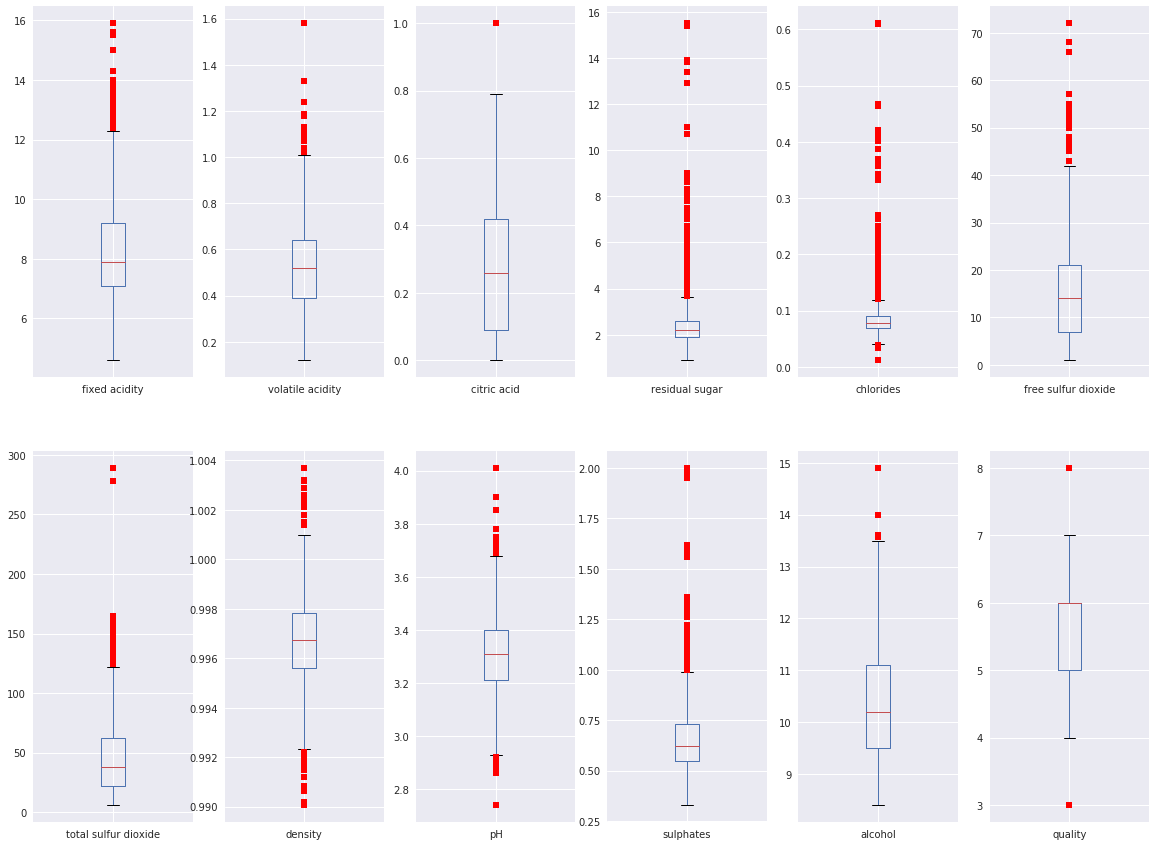

In [7]:
red_square = dict(markerfacecolor='r', marker='s')
with plt.style.context('seaborn'):
    print("------------------------------------------------ Box Plot Analysis (Red Wine) -------------------------------------------------")
    data_red[numerical_features_r].plot(kind='box',  subplots=True, layout=(2, 6), figsize=(20, 15), flierprops=red_square)
plt.savefig("boxplot_r.jpg")
plt.show()

----------------------------------------------- Box Plot Analysis (White Wine) ------------------------------------------------


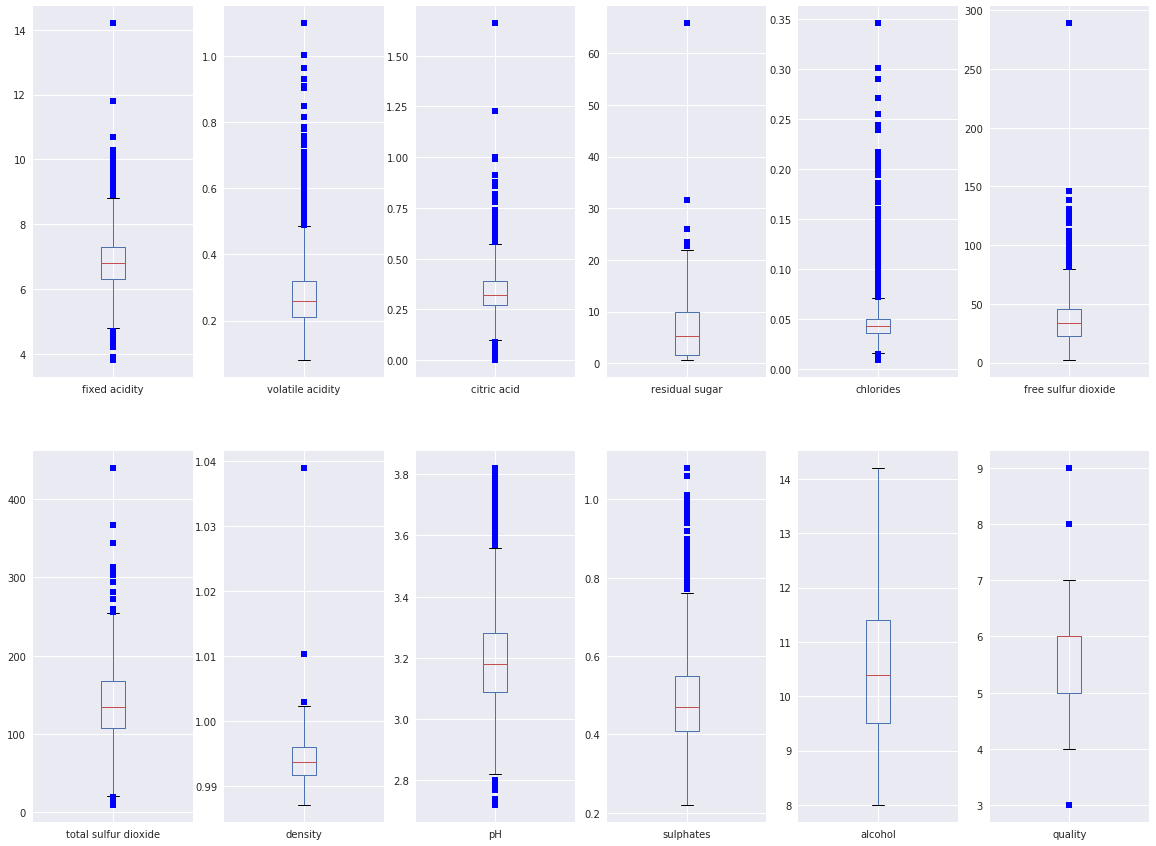

In [8]:
blue_square = dict(markerfacecolor='b', marker='s')
with plt.style.context('seaborn'):
    print("----------------------------------------------- Box Plot Analysis (White Wine) ------------------------------------------------")
    data_white[numerical_features_w].plot(kind='box',  subplots=True, layout=(2, 6), figsize=(20, 15), flierprops=blue_square)
plt.savefig("boxplot_w.jpg")
plt.show()

From our visual observation, red wine has a relatively large number of outliers in the upper region for *residual sugar, chlorides and sulphates* while white wine has a relatively large number of outliers in the upper region for *volatile acidity and chlorides*. Hence, we must take note of the outliers at the higher end which may skew the regression model.

### 3.2 Visual Analysis - Histogram

We will be conducting a `histogram analysis` to inspect the data for patterns.

---------------------------------------------------- Histogram (Red Wine) -----------------------------------------------------


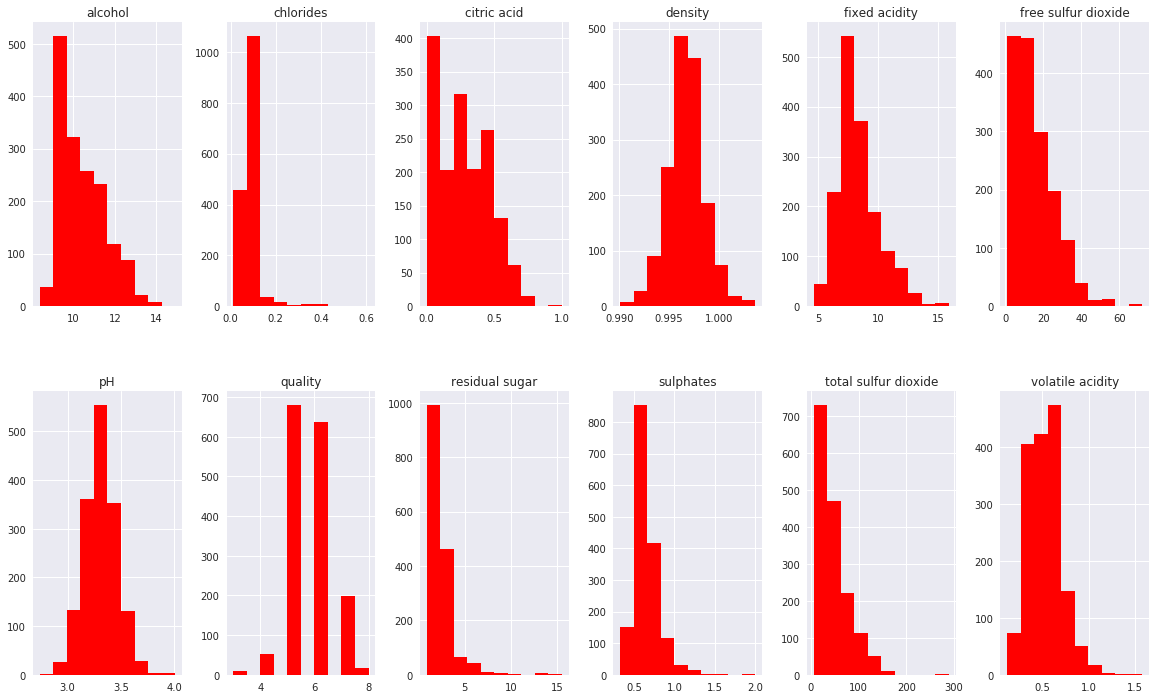

In [9]:
with plt.style.context('seaborn'):
    print("---------------------------------------------------- Histogram (Red Wine) -----------------------------------------------------")
    data_red[numerical_features_r].hist(layout=(2,6), figsize=(20,12), facecolor='r')
plt.savefig("histogram_r.jpg")
plt.show()

--------------------------------------------------- Histogram (White Wine) ---------------------------------------------------


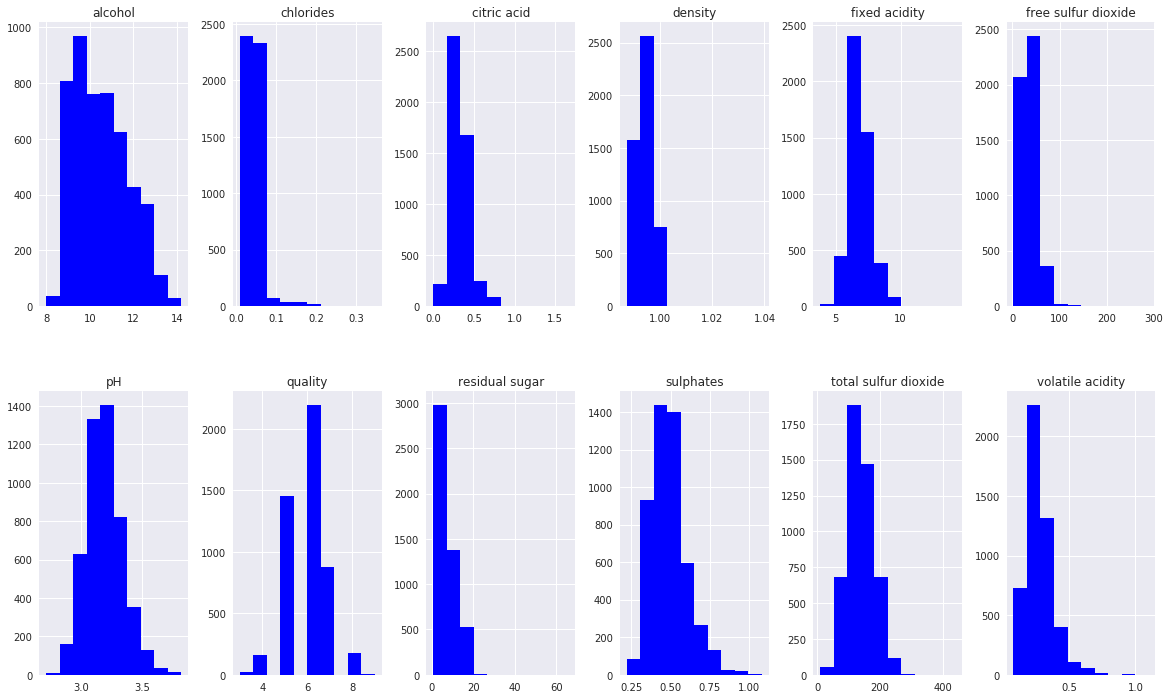

In [10]:
with plt.style.context('seaborn'):
    print("--------------------------------------------------- Histogram (White Wine) ---------------------------------------------------")
    data_white[numerical_features_w].hist(layout=(2,6), figsize=(20,12), facecolor='b')    
plt.savefig("histogram_w.jpg")
plt.show()

Based on a visual observation we noted the following:
- Residual sugar and total sulfur dioxide is on average lower for red wine as compared to white wine.
- Sulphates is on average lower for white wine as compared to red wine.
- Wine Quality ratings are approximately normally distributed in the region of 5-7 for both types of wine with most of the quality readings in that region. However, this can be expected for a typical ratings dataset.

### 3.3 Correlation Analysis - Red Wine
We will be analysing it in 2 parts, first we will remove attributes that have a low correlation with the emperical wine quality data, so as to filter for attributes that have a greater impact on the quality of the wine.

Then, taking the remaining attributes, we will remove attributes with a high correlation with other attributes, keeping the attribute with the highest correlation to wine quality. This is so as to filter out identical attributes.

In [11]:
print("-------------------------------------------- Attribute Correlation Table - Red Wine -------------------------------------------")
data_red.corr()

-------------------------------------------- Attribute Correlation Table - Red Wine -------------------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


---------------------------------------------- Attribute R2 Heat Map - Red Wine ----------------------------------------------


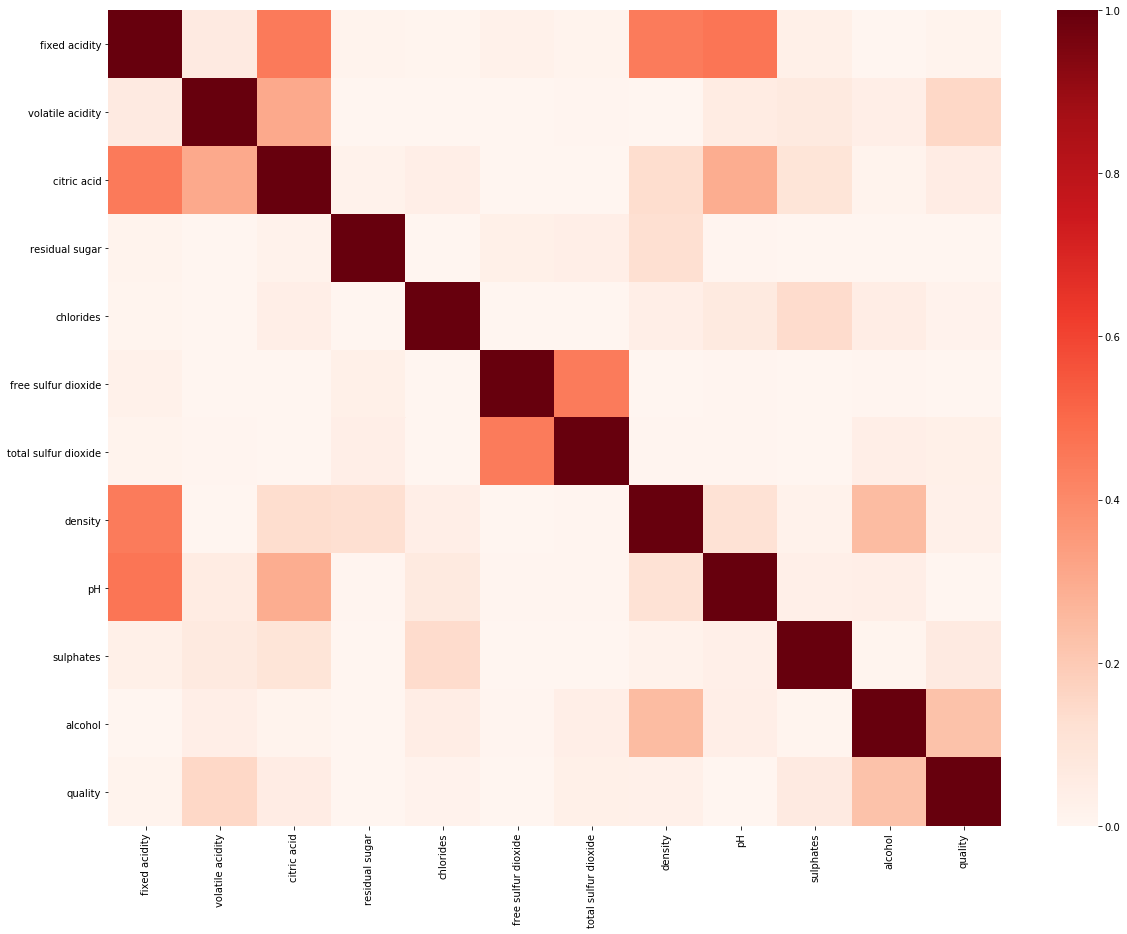

In [12]:
import seaborn as sns
r2 = data_red.corr()**2
plt.subplots(figsize=(20,15))
sns.heatmap(r2,
            cmap="Reds")
print("---------------------------------------------- Attribute R2 Heat Map - Red Wine ----------------------------------------------")
plt.show()

### 3.3.1 Removing Attributes - Red Wine (Low Correlation with Wine Quality)
Removing attributes with a less than 15% correlation with our wine quality data.

In [13]:
# given a dataframe df, and a target variable and threshold
# return all columns in df which are 'highly' correlated to target
# definition of 'high' correlated given by parameter threshold

def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features


features_selected = corr_features(data_red, 'quality', 0.15)
print("------------------------------------------ Attribute Selection - Red Wine -----------------------------------------")
print()
print(f"Selected Attributes: {features_selected}")
print()
print("Removed Attributes: fixed acidity, residual sugar, chlorides, free sulfur dioxide, pH")

------------------------------------------ Attribute Selection - Red Wine -----------------------------------------

Selected Attributes: ['volatile acidity', 'citric acid', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']

Removed Attributes: fixed acidity, residual sugar, chlorides, free sulfur dioxide, pH


----------- Attribute R2 Heat Map - Red Wine (after removing attributes with low correlation) -----------


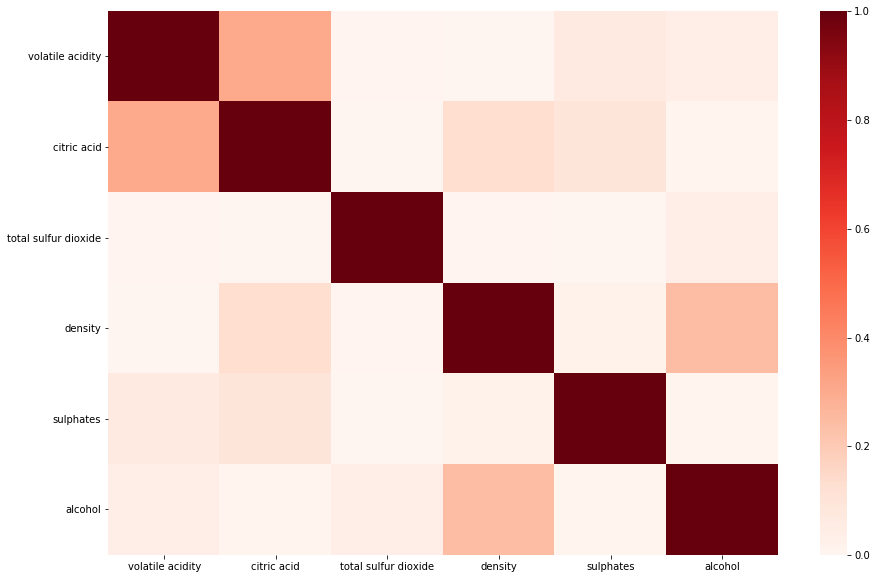

In [14]:
r2 = data_red[features_selected].corr()**2
plt.subplots(figsize=(15,10))
sns.heatmap(r2,
            xticklabels=r2.columns.values,
            yticklabels=r2.columns.values,
            cmap="Reds")
print("----------- Attribute R2 Heat Map - Red Wine (after removing attributes with low correlation) -----------")
plt.show()

### 3.3.2 Removing Attribute - Red Wine (High Correlation with another Attribute)
From the filtered attributes above, we removed attributes with more than a 50% correlation with another attribute of wine. (not including wine quality, our output data)

In [15]:
# get the feature that has the most number of features
# it is correlated with, beyond certain threshold

def most_corr_feature(df, threshold):
    r2_matrix = abs(df.corr())
    count = r2_matrix[r2_matrix>threshold].count()
    return count.sort_values(ascending=False).index[0]


# return true if all the features are uncorrelated,
# as defined by a threshold

def all_features_uncorr(df, threshold):
    r2_matrix = abs(df.corr())
    n = len(r2_matrix)
    return r2_matrix[r2_matrix>threshold].count().sum()==n


# get a set of uncorrelated features

def get_uncorr_features(df, threshold):
    features = df.columns.tolist()
    while all_features_uncorr(df[features], threshold) == False:
        most_corr_fea = most_corr_feature(df[features], threshold)
        features.remove(most_corr_fea)
    return features

features_selected = get_uncorr_features(data_red[features_selected], 0.5)
print(f"Final Selected Attributes - Red Wine : {features_selected}")

Final Selected Attributes - Red Wine : ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


-------------------------- Attribute R2 Heat Map (Final Selected Attributes - Red Wine) --------------------------


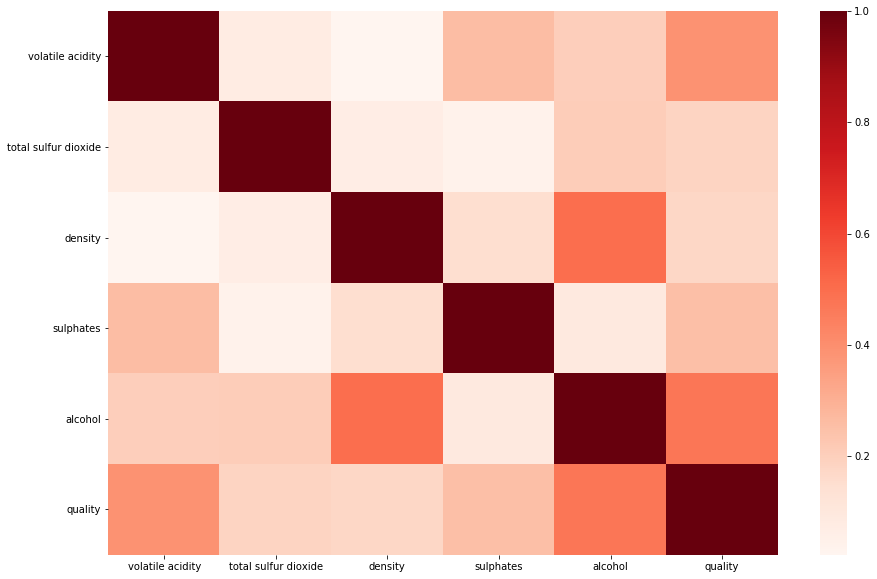

In [16]:
data_red[features_selected+['quality']].corr()
r2 = abs(data_red[features_selected+['quality']].corr())
plt.subplots(figsize=(15,10))
sns.heatmap(r2,
            xticklabels=r2.columns.values,
            yticklabels=r2.columns.values,
            cmap="Reds")
plt.savefig("finalcorr_r.jpg")
print("-------------------------- Attribute R2 Heat Map (Final Selected Attributes - Red Wine) --------------------------")
plt.show()

### 3.4 Correlation Analysis - White Wine
We will be analysing it in 2 parts, first we will remove attributes that have a low correlation with the emperical wine quality data, so as to filter for attributes that have a greater impact on the quality of the wine.

Then, taking the remaining attributes, we will remove attributes with a high correlation with other attributes, keeping the attribute with the highest correlation to wine quality. This is so as to filter out identical attributes.

In [17]:
print("-------------------------------------------Attribute Correlation Table - White Wine--------------------------------------------")
data_white.corr()

-------------------------------------------Attribute Correlation Table - White Wine--------------------------------------------


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


--------------------------------------------- Attribute R2 Heat Map - White Wine ---------------------------------------------


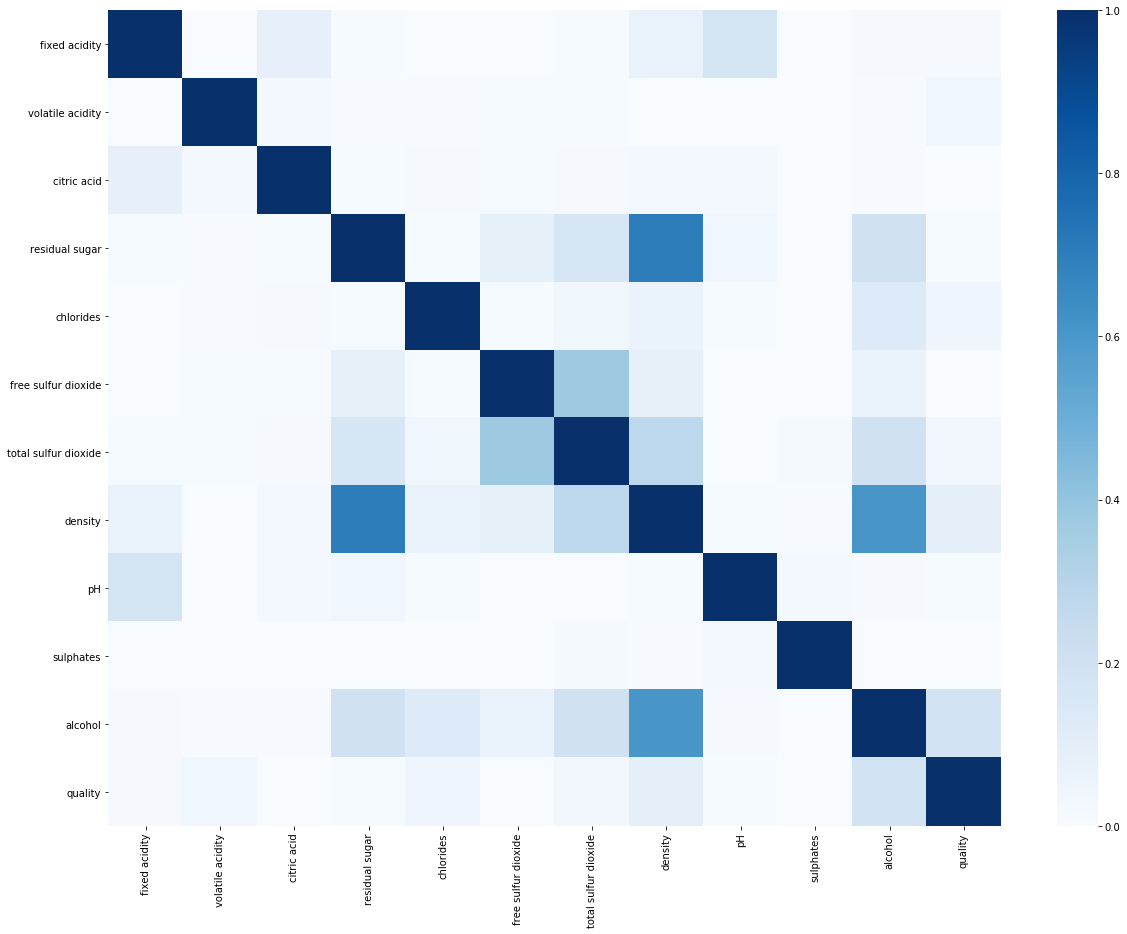

In [18]:
r2_w = data_white.corr()**2
plt.subplots(figsize=(20,15))
sns.heatmap(r2_w,
            xticklabels=r2_w.columns.values,
            yticklabels=r2_w.columns.values,
            cmap="Blues")
print("--------------------------------------------- Attribute R2 Heat Map - White Wine ---------------------------------------------")
plt.show()

### 3.4.1 Removing Attributes - White Wine (Low Correlation with Wine Quality)
Removing attributes with a less than 15% correlation with our emperical quality data.

In [19]:
def corr_features(df, target, threshold):
    corr_features = []
    for feature in df.columns:
        if feature==target: continue
        x = df[feature]
        y = df[target]
        r2 = np.corrcoef(x,y)[0][1]
        if abs(r2)>threshold:
            corr_features.append(feature)
    return corr_features

features_selected_w = corr_features(data_white, 'quality', 0.15)

print("--------------------------------- Attribute Selection - White Wine ---------------------------------")
print()
print(f"Selected Attributes: {features_selected_w}")
print()
print("Removed Attributes: fixed acidity, citric acid, residual sugar, free sulfur dioxide, pH, sulphates")

--------------------------------- Attribute Selection - White Wine ---------------------------------

Selected Attributes: ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'density', 'alcohol']

Removed Attributes: fixed acidity, citric acid, residual sugar, free sulfur dioxide, pH, sulphates


--------------- Attribute R2 Heat Map - White Wine (after removing attributes with low correlation) ---------------


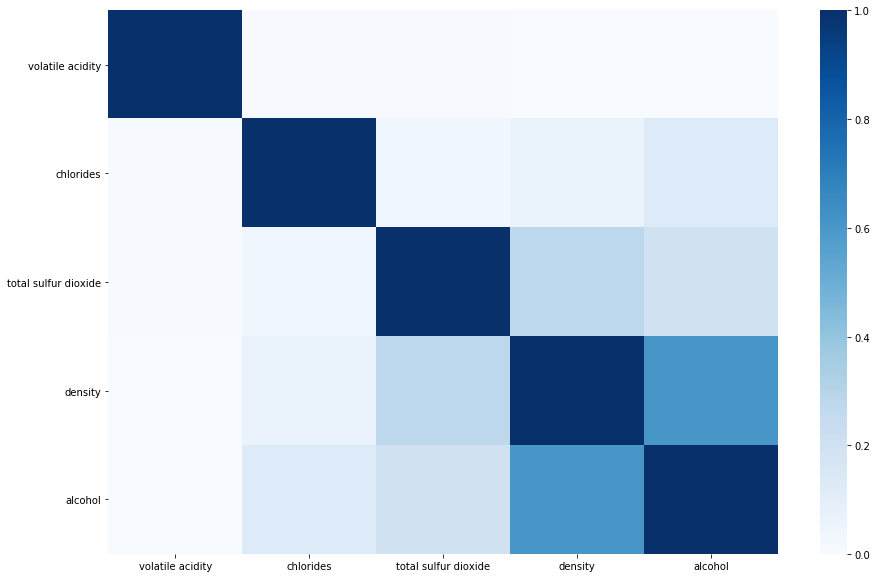

In [20]:
r2_w = data_white[features_selected_w].corr()**2
plt.subplots(figsize=(15,10))
sns.heatmap(r2_w,
            xticklabels=r2_w.columns.values,
            yticklabels=r2_w.columns.values,
            cmap="Blues")
print("--------------- Attribute R2 Heat Map - White Wine (after removing attributes with low correlation) ---------------")
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.show()

### 3.4.2 Removing Attribute - White Wine (High Correlation with another Attribute)
From the filtered attributes above, we removed attributes with more than a 50% correlation with another attribute of wine. (not including wine quality, our output data)

In [21]:
features_selected_w = get_uncorr_features(data_white[features_selected_w], 0.5)
print(f"Final Selected Attributes - White Wine : {features_selected_w}")
print("Removed Attribute: Density")

Final Selected Attributes - White Wine : ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol']
Removed Attribute: Density


-------------------------- Attribute R2 Heat Map - White Wine (Final Selected Attributes) --------------------------


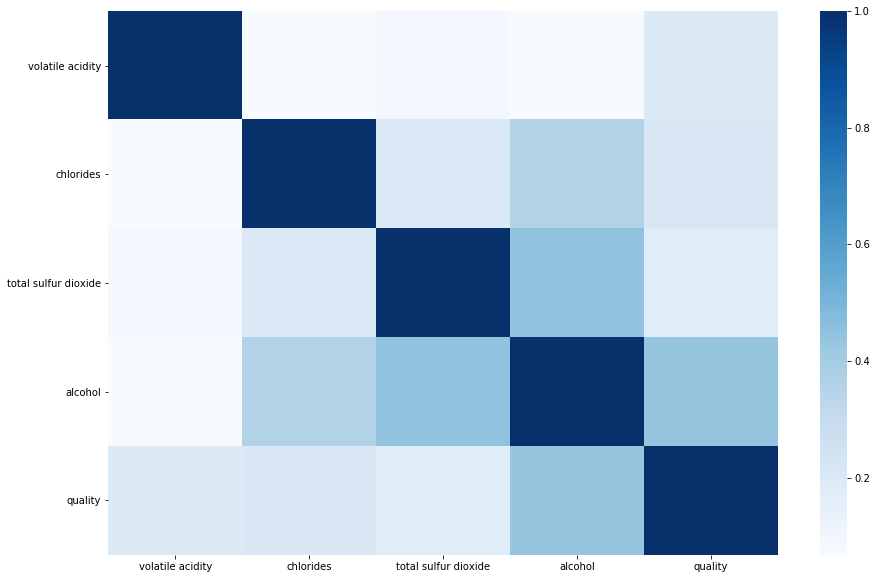

In [22]:
data_white[features_selected_w+['quality']].corr()
r2_w = abs(data_white[features_selected_w+['quality']].corr())
plt.subplots(figsize=(15,10))
sns.heatmap(r2_w,
            xticklabels=r2_w.columns.values,
            yticklabels=r2_w.columns.values,
            cmap="Blues")
plt.savefig("finalcorr_w.jpg")
print("-------------------------- Attribute R2 Heat Map - White Wine (Final Selected Attributes) --------------------------")
plt.yticks(rotation = 0)
plt.xticks(rotation = 0)
plt.show()

## 4 Model Building - Red Wine

We will build a **Multiple Linear Regression model** based on the selected features.  We split the dataset into a training and a test data set. 

We used the `model_selection` package form `sklearn` to split our dataset randomly into 50 / 50 i.e. we keep 50% of the dataset as the test data set.

The **Linear Regression model** was then built based on the training dataset.

For model fitting, we first create instantiate a `LinearRegression` object, and subsequently call the `.fit` method.

The r<sup>2</sup> score was then calculated for both the training and test data set to measure the goodness of the model on both dataset.

This spliting process was then repeated with 100 different random seeds (1 - 100) to generate 100 different sample sets and their corresponding  models.

In [23]:
## repeated 100 samples cross validation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

result_df = pd.DataFrame(columns = ['randomstate','coeff','intercept','score_train','score_test'])
print("----------- Multiple Linear Regression (Red Wine) Features Selected -----------")
display(features_selected)

## function to get the average accuracy from a dataframe of y_pred and y_actual(qualtity)
def getaccuracy(df):
    accsum = 0
    count = 0
    for index, row in df.iterrows():
        acc = row['y_pred'] / row['quality']
        accsum += acc
        count += 1
        
    avgacc = accsum/count
    
    return avgacc

## 100 random samples generated using random seeds 1-100
for i in range (1,101):
    X = data_red[features_selected]
    y = data_red[["quality"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
    
    model = LinearRegression().fit(X_train, y_train)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    coef = model.coef_
    bias = model.intercept_
    
    accdf_train = pd.DataFrame()
    accdf_train['quality'] = y_train['quality']
    y_pred_train = model.predict(X_train)
    accdf_train['y_pred'] = y_pred_train
    avgacc_train = getaccuracy(accdf_train)
    
    accdf_test = pd.DataFrame()
    accdf_test['quality'] = y_test['quality']
    y_pred_test = model.predict(X_test)
    accdf_test['y_pred'] = y_pred_test
    avgacc_test = getaccuracy(accdf_test)
    
    result_df = result_df.append({'randomstate':i,'coeff': coef, 'intercept': bias, 
                                  'score_train': r2_train, 'score_test':r2_test,
                                  'avg_acc_train': avgacc_train, 'avg_acc_test': avgacc_test}, ignore_index=True)
    
print()
print()
print("-------------------- Selection of the first 5 Linear Regression Models --------------------")
display(result_df.head())

----------- Multiple Linear Regression (Red Wine) Features Selected -----------


['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']



-------------------- Selection of the first 5 Linear Regression Models --------------------


,randomstate,coeff,intercept,score_train,score_test,avg_acc_test,avg_acc_train
0,1,"[[-1.3278475848940179, -0.0025868033149854643,...",[-2.977346689238126],0.358136,0.325940,1.013497,1.014831
1,2,"[[-1.3174633281129584, -0.0022768443413508275,...",[-16.75651635061648],0.339723,0.332878,0.998758,1.015683
2,3,"[[-1.183359732948285, -0.0021477126463153124, ...",[0.6707694006573206],0.352898,0.332189,1.012375,1.014659
3,4,"[[-1.232766657933017, -0.002191778643397845, 1...",[1.637587393673003],0.352745,0.332888,1.010678,1.014684
4,5,"[[-1.3094785824948951, -0.0015310537526477658,...",[-16.14321141313436],0.323240,0.358235,1.012925,1.014983


The graph shows the models ordered by thier accuracy from those having the lowest average predictions to the highest average predictions. In this case, an accuracy of >100% means that the model predicts a higher value on average as compared to the actual quality score. 

The standard deviation of the 100 `avg_acc_test` and the 100 `avg_acc_train` was then calculated.
A confidence interval of 95% was derived by taking 2 standard deviations away from the `avg_acc`.
This is represented by shaded region in graph below.

0.001430483878060788
0.011881015173673615


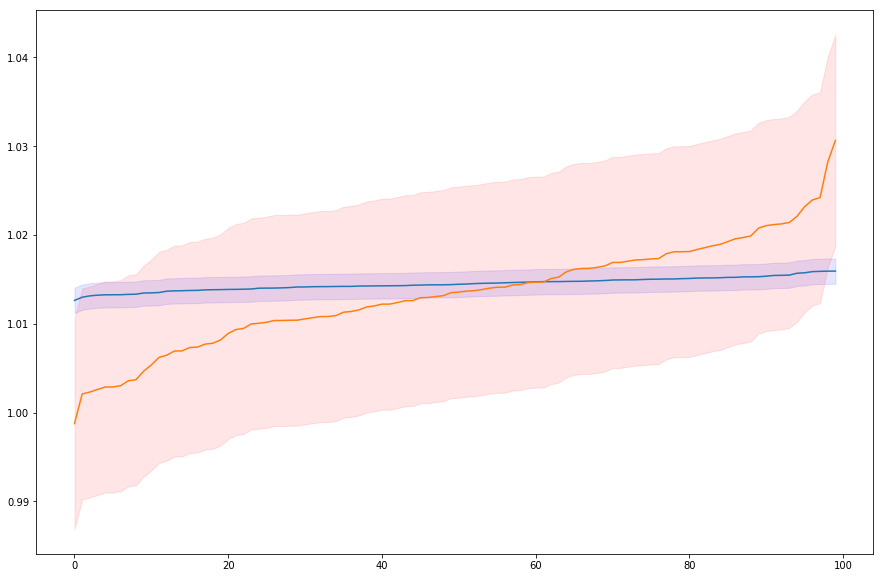

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
result_df_acctrain = result_df.sort_values(by = 'avg_acc_train', ascending = True)
result_df_acctrain = result_df_acctrain.reset_index()

result_df_acctest = result_df.sort_values(by = 'avg_acc_test', ascending = True)
result_df_acctest = result_df_acctest.reset_index()

import statistics as stats
acc_train_ci = 2 * stats.stdev(result_df['avg_acc_train'])
acc_test_ci = 2 * stats.stdev(result_df['avg_acc_test'])

print(acc_train_ci)
print(acc_test_ci)
fig, ax = plt.subplots(figsize = (15,10))
x = result_df_acctrain.index
y1 = result_df_acctrain['avg_acc_train']
ax.plot(x, y1)
ax.fill_between(x, (y1-acc_train_ci), (y1+acc_train_ci), color='b', alpha=.1)

y2 = result_df_acctest['avg_acc_test']
ax.plot(x, y2)
ax.fill_between(x, (y2-acc_test_ci), (y2+acc_test_ci), color='r', alpha=.1)

The model building process will generate 100 sets of r<sup>2</sup> value in the form {`score_train`, `score_test`}

In order to visualise the spread of the 100 sets, we plotted a scatterplot using `pyplot.scatter` from the `matplotlib` library.

The x-axis plots the `score_test` values while the y-axis plots the `score_train` values.

------------------------- Red Wine - Scatterplot of score_train(y) against score_test(x) -------------------------


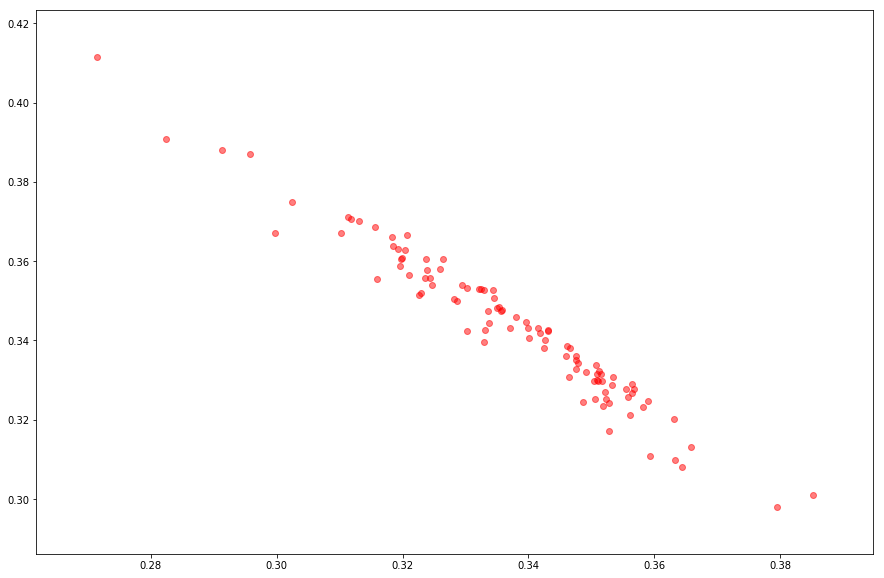

In [25]:
#visualisation of the different score_test and score_train

print("------------------------- Red Wine - Scatterplot of score_train(y) against score_test(x) -------------------------")
plt.subplots(figsize=(15,10))
plt.scatter(result_df['score_test'],result_df['score_train'], c="red", alpha=0.5)
plt.show()

In order to avoid overfitting in our models, we will be selecting 3 models with the lowest difference in the r<sup>2</sup> values of the `score_train` and `score_test`.

This is to ensure that the performance of the Linear Regression model can likely be replicated on any sample dataset and is not overfitted to the training data set.

To better visualise the size of the difference in the 100 samples which we performed earlier, we plotted a line graph using the `pyplot.plot` function from the `matplotlib` library with a line for `score_train` and a line for `score_test`.

The 100 samples were first sorted into ascending order based on the r<sup>2</sup> values of the training scores.

The y-axis plots the r<sup>2</sup> values of `score_train` and `score_test` while the x-axis is the new index assigned after the sorting.

Hence, the points where the 2 lines intersects will be where there is the smallest difference between the 2 r<sup>2</sup> values.

-------------------------------------- Plot of R2 scores ordered by training score -------------------------------------


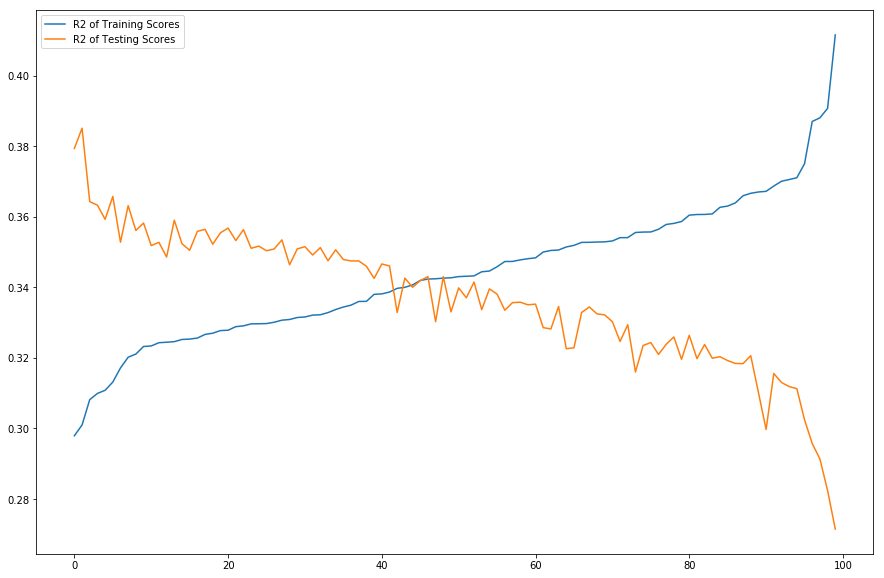

In [26]:
#selecting the model where the R2 values have the smallest difference, ie the point of intersection

result_df_line = result_df.sort_values(by = 'score_train', ascending = True)
result_df_line = result_df_line.reset_index()

print("-------------------------------------- Plot of R2 scores ordered by training score -------------------------------------")


plt.subplots(figsize=(15,10))
plt.plot(result_df_line.index, result_df_line['score_train'], label = 'R2 of Training Scores')
plt.plot(result_df_line.index, result_df_line['score_test'], label = 'R2 of Testing Scores')
plt.legend()

In [27]:
# selecting the best equation from the random state
# selecting the model with the smallest difference between r2 value for score_train and score_test

result_df["score_difference"] = abs(result_df["score_train"] - result_df["score_test"])

result_df = result_df.sort_values(by = 'score_difference', ascending = True)
result_df = result_df.reset_index()

print("-------------------- Snapshot of the best models sorted by the min difference in accuracy --------------------")
display(result_df.head())

bestrandomstate_1 = result_df["randomstate"][0]
bestcoeff_1 = result_df["coeff"][0]
bestintercept_1 = result_df["intercept"][0]
bestscore_train_1 = result_df["score_train"][0]
bestscore_test_1 = result_df["score_test"][0]

bestrandomstate_2 = result_df["randomstate"][1]
bestcoeff_2 = result_df["coeff"][1]
bestintercept_2 = result_df["intercept"][1]
bestscore_train_2 = result_df["score_train"][1]
bestscore_test_2 = result_df["score_test"][1]

bestrandomstate_3 = result_df["randomstate"][2]
bestcoeff_3 = result_df["coeff"][2]
bestintercept_3 = result_df["intercept"][2]
bestscore_train_3 = result_df["score_train"][2]
bestscore_test_3 = result_df["score_test"][2]

np.set_printoptions(precision = 5)

print(f"Features : {features_selected}")
print()
print()

print("---------------------------------- Best Model -----------------------------------")
print(f"Random Seed: {bestrandomstate_1}")
print(f"Coefficients: {bestcoeff_1}")
print(f"Intercept : {bestintercept_1}")
print(f"R2 of Training Set : {bestscore_train_1:.5f}")
print(f"R2 of Testing Set : {bestscore_test_1:.5f}")
print()

print("----------------------------------- 2nd Model -----------------------------------")
print(f"Random Seed: {bestrandomstate_2}")
print(f"Coefficients: {bestcoeff_2}")
print(f"Intercept : {bestintercept_2}")
print(f"R2 of Training Set : {bestscore_train_2:.5f}")
print(f"R2 of Testing Set : {bestscore_test_2:.5f}")
print()

print("----------------------------------- 3rd Model -----------------------------------")
print(f"Random Seed: {bestrandomstate_3}")
print(f"Coefficients: {bestcoeff_3}")
print(f"Intercept : {bestintercept_3}")
print(f"R2 of Training Set : {bestscore_train_3:.5f}")
print(f"R2 of Testing Set : {bestscore_test_3:.5f}")
print()

# storing of the best models into a new dataframe
mb_red_df = pd.DataFrame(columns = ['randomstate', 'coeff', 'intercept', 'score_train', 'score_test'])
mb_red_df.loc[0] = [bestrandomstate_1, bestcoeff_1, bestintercept_1, bestscore_train_1, bestscore_test_1]
mb_red_df.loc[1] = [bestrandomstate_2, bestcoeff_2, bestintercept_2, bestscore_train_2, bestscore_test_2]
mb_red_df.loc[2] = [bestrandomstate_3, bestcoeff_3, bestintercept_3, bestscore_train_3, bestscore_test_3]              

-------------------- Snapshot of the best models sorted by the min difference in accuracy --------------------


,index,randomstate,coeff,intercept,score_train,score_test,avg_acc_test,avg_acc_train,score_difference
0,71,72,"[[-1.163836281585176, -0.00210984922857631, -1...",[15.160867075110506],0.341953,0.341898,1.019248,1.013755,0.000056
1,62,63,"[[-1.2547610244409493, -0.0024117405618375738,...",[4.46917703500318],0.342617,0.343051,1.010391,1.015865,0.000434
2,30,31,"[[-1.337228376258548, -0.0024380198616538815, ...",[-10.45301669592244],0.340686,0.340021,1.004655,1.015277,0.000665
3,89,90,"[[-1.2172852977011925, -0.001889886408765547, ...",[0.7073598499333107],0.342356,0.343065,1.018125,1.013304,0.000709
4,57,58,"[[-1.1295751829141016, -0.001788187819195295, ...",[9.188826827081513],0.343253,0.341517,1.012004,1.013839,0.001736


Features : ['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']


---------------------------------- Best Model -----------------------------------
Random Seed: 72
Coefficients: [[-1.16384e+00 -2.10985e-03 -1.21431e+01  7.40562e-01  2.69941e-01]]
Intercept : [15.16087]
R2 of Training Set : 0.34195
R2 of Testing Set : 0.34190

----------------------------------- 2nd Model -----------------------------------
Random Seed: 63
Coefficients: [[-1.25476 -0.00241 -1.63038  0.81371  0.29018]]
Intercept : [4.46918]
R2 of Training Set : 0.34262
R2 of Testing Set : 0.34305

----------------------------------- 3rd Model -----------------------------------
Random Seed: 31
Coefficients: [[-1.33723e+00 -2.43802e-03  1.33248e+01  5.00549e-01  3.14082e-01]]
Intercept : [-10.45302]
R2 of Training Set : 0.34069
R2 of Testing Set : 0.34002



### 5 Model Evaluation & Sensitivity Analysis - Red Wine

We will be performing our evaluation and sensitivity analysis on the 3 best models which we have selected earlier.


During the evaluation, we will be applying the selected Linear Regression models to the entire original red wine dataset to get the `y-pred` values. The `y-pred` values will then be compared with the actual quality rating value `y-actual`.

In sensitivity analysis, we will be evaluating our model over 4 different tolerance ranges (0.25, 0.5, 0.75, 1) to get the mean absolute error (MAE).

We will then also be evaluating the MAE as a percentage of the average of the `y_actual` values

<br>

i.e. When evaluting over a tolerance range of **0.5**, 

A value of 5.3 for `y_pred` and a value of 5 for `y_actual` will return a value of 0 for the `error`

A value of 5.9 for `y_pred` and a value of 5 for `y_actual` will return a value of 0.4 for the `error`

A value of 4.3 for `y_pred` and a value of 5 for `y_actual` will return a value of 0.2 for the `error`

The MAE for this subset of 3 values is **0.2**

The MAE as a % of mean is **0.2 / 5** = **0.04**

In [28]:
## model evaluation

from sklearn.metrics import mean_absolute_error

# getting the linear regression model from the randomstate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_1)

model = LinearRegression().fit(X_train, y_train)

# applying the linear regression model over the entire dataset
X_test = data_red[features_selected]
y_test = data_red[["quality"]]

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("Model Evaluation")
print()

print("-------- Best Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

## function to return the error after applying the specified tolerance range
def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

bestmodel_df["error_0"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0)    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

print("Snapshot of the application of tolerance ranges on the dataset")
print("--------------------------------------------------------------")
display(bestmodel_df.head())

# determing mean absolute error
error_0_mean = bestmodel_df["error_0"].mean()
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

# creating result dataframe to store values
me_red_df = pd.DataFrame(columns = ['error_0', 'error_0.25', 'error_0.5', 'error_0.75', 'error_1'])

# storing model evaluation results into the dataframe
me_red_df.loc[0] = [error_0_mean, error_25_mean, error_50_mean, error_75_mean, error_100_mean]
#display(me_red_df)

# displaying the result
print("> With a tolerance value of 0, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_0_mean, error_0_mean/ave))
print("> With a tolerance value of 0.25, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_25_mean, error_25_mean/ave))
print("> With a tolerance value of 0.5, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_50_mean, error_50_mean/ave))
print("> With a tolerance value of 0.75, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_75_mean, error_75_mean/ave))
print("> With a tolerance value of 1, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_100_mean, error_100_mean/ave))
print()

##############
# Similar evaulation code for 2nd model
##############

# getting the linear regression model from the randomstate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_2)

model = LinearRegression().fit(X_train, y_train)

# applying the linear regression model over the entire dataset
X_test = data_red[features_selected]
y_test = data_red[["quality"]]

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 2nd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

## atleasterror function defined above
bestmodel_df["error_0"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0)    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

print("Snapshot of the application of tolerance ranges on the dataset")
print("--------------------------------------------------------------")
display(bestmodel_df.head())

# determing mean absolute error
error_0_mean = bestmodel_df["error_0"].mean()
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

# storing model evaluation results into the dataframe
me_red_df.loc[1] = [error_0_mean, error_25_mean, error_50_mean, error_75_mean, error_100_mean]

# displaying the result
print("> With a tolerance value of 0, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_0_mean, error_0_mean/ave))
print("> With a tolerance value of 0.25, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_25_mean, error_25_mean/ave))
print("> With a tolerance value of 0.5, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_50_mean, error_50_mean/ave))
print("> With a tolerance value of 0.75, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_75_mean, error_75_mean/ave))
print("> With a tolerance value of 1, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_100_mean, error_100_mean/ave))
print()

##############
# Similar evaulation code for 3nd model
##############

# getting the linear regression model from the randomstate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_3)

model = LinearRegression().fit(X_train, y_train)

# applying the linear regression model over the entire dataset
X_test = data_red[features_selected]
y_test = data_red[["quality"]]

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 3rd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df = bestmodel_df.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

## atleasterror function defined above
bestmodel_df["error_0"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0)    
bestmodel_df["error_0.25"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.25)
bestmodel_df["error_0.5"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.5)
bestmodel_df["error_0.75"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 0.75)
bestmodel_df["error_1"] = atleasterror(bestmodel_df["y_pred"], bestmodel_df["y_actual"], 1)

print("Snapshot of the application of tolerance ranges on the dataset")
print("--------------------------------------------------------------")
display(bestmodel_df.head())

# determing mean absolute error
error_0_mean = bestmodel_df["error_0"].mean()
error_25_mean = bestmodel_df["error_0.25"].mean()
error_50_mean = bestmodel_df["error_0.5"].mean()
error_75_mean = bestmodel_df["error_0.75"].mean()
error_100_mean = bestmodel_df["error_1"].mean()

# storing model evaluation results into the dataframe
me_red_df.loc[2] = [error_0_mean, error_25_mean, error_50_mean, error_75_mean, error_100_mean]

# displaying the result
print("> With a tolerance value of 0, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_0_mean, error_0_mean/ave))
print("> With a tolerance value of 0.25, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_25_mean, error_25_mean/ave))
print("> With a tolerance value of 0.5, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_50_mean, error_50_mean/ave))
print("> With a tolerance value of 0.75, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_75_mean, error_75_mean/ave))
print("> With a tolerance value of 1, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_100_mean, error_100_mean/ave))
print()

Model Evaluation

-------- Best Model --------
Mean Absolute Error: 0.51
MAE as % of mean: 0.09


Snapshot of the application of tolerance ranges on the dataset
--------------------------------------------------------------


,y_pred,y_actual,error_0,error_0.25,error_0.5,error_0.75,error_1
0,5.110257,5,0.110257,0,0,0,0
1,5.040128,5,0.040128,0,0,0,0
2,5.182571,5,0.182571,0,0,0,0
3,5.664571,6,0.335429,0.085429,0,0,0
4,5.110257,5,0.110257,0,0,0,0


> With a tolerance value of 0, the MAE is 0.51149, which as a percentage of mean is 0.09075
> With a tolerance value of 0.25, the MAE is 0.29786, which as a percentage of mean is 0.05285
> With a tolerance value of 0.5, the MAE is 0.16163, which as a percentage of mean is 0.02868
> With a tolerance value of 0.75, the MAE is 0.08238, which as a percentage of mean is 0.01462
> With a tolerance value of 1, the MAE is 0.04184, which as a percentage of mean is 0.00742

-------- 2nd Model --------
Mean Absolute Error: 0.51
MAE as % of mean: 0.09


Snapshot of the application of tolerance ranges on the dataset
--------------------------------------------------------------


,y_pred,y_actual,error_0,error_0.25,error_0.5,error_0.75,error_1
0,5.065463,5,0.065463,0,0,0,0
1,4.975368,5,0.024632,0,0,0,0
2,5.132554,5,0.132554,0,0,0,0
3,5.661779,6,0.338221,0.0882208,0,0,0
4,5.065463,5,0.065463,0,0,0,0


> With a tolerance value of 0, the MAE is 0.50745, which as a percentage of mean is 0.09004
> With a tolerance value of 0.25, the MAE is 0.29738, which as a percentage of mean is 0.05276
> With a tolerance value of 0.5, the MAE is 0.16275, which as a percentage of mean is 0.02888
> With a tolerance value of 0.75, the MAE is 0.08322, which as a percentage of mean is 0.01477
> With a tolerance value of 1, the MAE is 0.04164, which as a percentage of mean is 0.00739

-------- 3rd Model --------
Mean Absolute Error: 0.51
MAE as % of mean: 0.09


Snapshot of the application of tolerance ranges on the dataset
--------------------------------------------------------------


,y_pred,y_actual,error_0,error_0.25,error_0.5,error_0.75,error_1
0,5.056165,5,0.056165,0,0,0,0
1,4.907383,5,0.092617,0,0,0,0
2,5.087193,5,0.087193,0,0,0,0
3,5.692721,6,0.307279,0.057279,0,0,0
4,5.056165,5,0.056165,0,0,0,0


> With a tolerance value of 0, the MAE is 0.50766, which as a percentage of mean is 0.09007
> With a tolerance value of 0.25, the MAE is 0.29878, which as a percentage of mean is 0.05301
> With a tolerance value of 0.5, the MAE is 0.16384, which as a percentage of mean is 0.02907
> With a tolerance value of 0.75, the MAE is 0.08392, which as a percentage of mean is 0.01489
> With a tolerance value of 1, the MAE is 0.04185, which as a percentage of mean is 0.00743



### 6 Model Building - White Wine

We repeated the same process to build the Multiple Linear Regression model for White Wine

In [29]:
## repeated 100 samples cross validation 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

result_df_w = pd.DataFrame(columns = ['randomstate','coeff','intercept','score_train','score_test'])

print("----- Multiple Linear Regression (White Wine) Features Selected -----")
display(features_selected_w)

## function to get the average accuracy from a dataframe of y_pred and y_actual(qualtity)
def getaccuracy(df):
    accsum = 0
    count = 0
    for index, row in df.iterrows():
        acc = row['y_pred'] / row['quality']
        accsum += acc
        count += 1
        
    avgacc = accsum/count
    
    return avgacc

## 100 random samples generated using random seeds 1-100
for i in range (1,101):
    X = data_white[features_selected_w]
    y = data_white[["quality"]]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=i)
    
    model = LinearRegression().fit(X_train, y_train)
    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)
    coef = model.coef_
    bias = model.intercept_
    
    accdf_train = pd.DataFrame()
    accdf_train['quality'] = y_train['quality']
    y_pred_train = model.predict(X_train)
    accdf_train['y_pred'] = y_pred_train
    avgacc_train = getaccuracy(accdf_train)
    
    accdf_test = pd.DataFrame()
    accdf_test['quality'] = y_test['quality']
    y_pred_test = model.predict(X_test)
    accdf_test['y_pred'] = y_pred_test
    avgacc_test = getaccuracy(accdf_test)
    
    result_df_w = result_df_w.append({'randomstate':i,'coeff': coef, 'intercept': bias, 
                                      'score_train': r2_train, 'score_test':r2_test,
                                      'avg_acc_train': avgacc_train, 'avg_acc_test': avgacc_test}, ignore_index=True)
    
print()
print()
print("------------------- Snapshot of the first 5 Linear Regression Models -------------------")    
display(result_df_w.head())



----- Multiple Linear Regression (White Wine) Features Selected -----


['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol']



------------------- Snapshot of the first 5 Linear Regression Models -------------------


,randomstate,coeff,intercept,score_train,score_test,avg_acc_test,avg_acc_train
0,1,"[[-2.010900391753256, -2.1972144752973164, 0.0...",[2.825194904345818],0.244349,0.243885,1.017949,1.018919
1,2,"[[-2.156252120724632, -1.6369030341743775, 0.0...",[2.929628440434624],0.245755,0.242286,1.020025,1.018582
2,3,"[[-2.163551481613023, -1.785117843204598, 0.00...",[2.7135409076812556],0.266925,0.221390,1.018496,1.017602
3,4,"[[-1.8475727543118636, -1.4062583741081272, 0....",[3.0616827838673233],0.225570,0.259954,1.016186,1.018591
4,5,"[[-1.922595816824653, -2.132404026133689, 0.00...",[2.725756624091883],0.243696,0.243353,1.021671,1.019069


The graph shows the models ordered by thier accuracy from those having the lowest average predictions to the highest average predictions. In this case, an accuracy of >100% means that the model predicts a higher value on average as compared to the actual quality score. 

The standard deviation of the 100 `avg_acc_test` and the 100 `avg_acc_train` was then calculated.
A confidence interval of 95% was derived by taking 2 standard deviations away from the `avg_acc`.
This is represented by shaded region in graph below.

0.0010648123957665455
0.007093136136841093


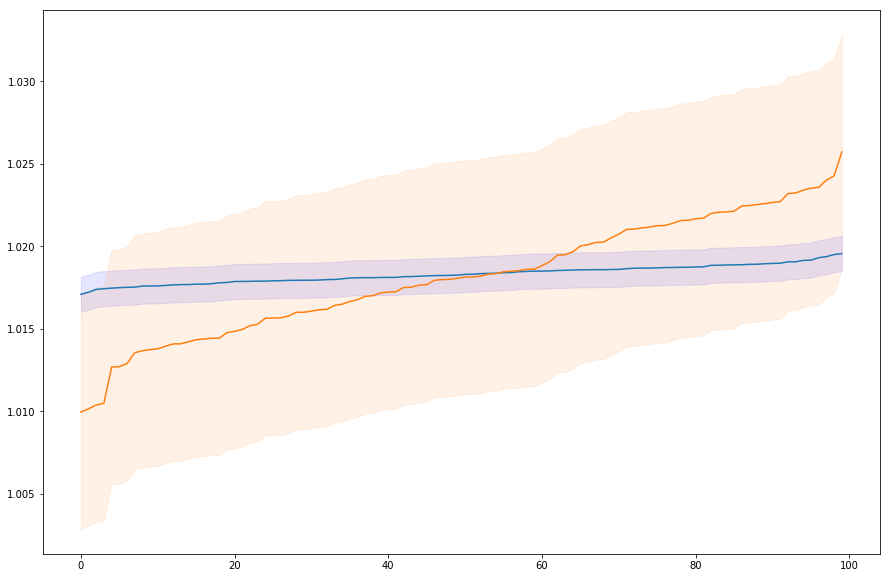

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
result_df_acctrain_w = result_df_w.sort_values(by = 'avg_acc_train', ascending = True)
result_df_acctrain_w = result_df_acctrain_w.reset_index()

result_df_acctest_w = result_df_w.sort_values(by = 'avg_acc_test', ascending = True)
result_df_acctest_w = result_df_acctest_w.reset_index()

import statistics as stats
acc_train_ci_w = 2 * stats.stdev(result_df_w['avg_acc_train'])
acc_test_ci_w = 2 * stats.stdev(result_df_w['avg_acc_test'])

print(acc_train_ci_w)
print(acc_test_ci_w)
fig, ax = plt.subplots(figsize = (15,10))
x = result_df_acctrain_w.index
y1 = result_df_acctrain_w['avg_acc_train']
ax.plot(x, y1)
ax.fill_between(x, (y1-acc_train_ci_w), (y1+acc_train_ci_w), color='b', alpha=.1)

y2 = result_df_acctest_w['avg_acc_test']
ax.plot(x, y2)
ax.fill_between(x, (y2-acc_test_ci_w), (y2+acc_test_ci_w), color='tab:orange', alpha=.1)

------------------------ White Wine - Scatterplot of score_train(y) against score_test(x) ------------------------


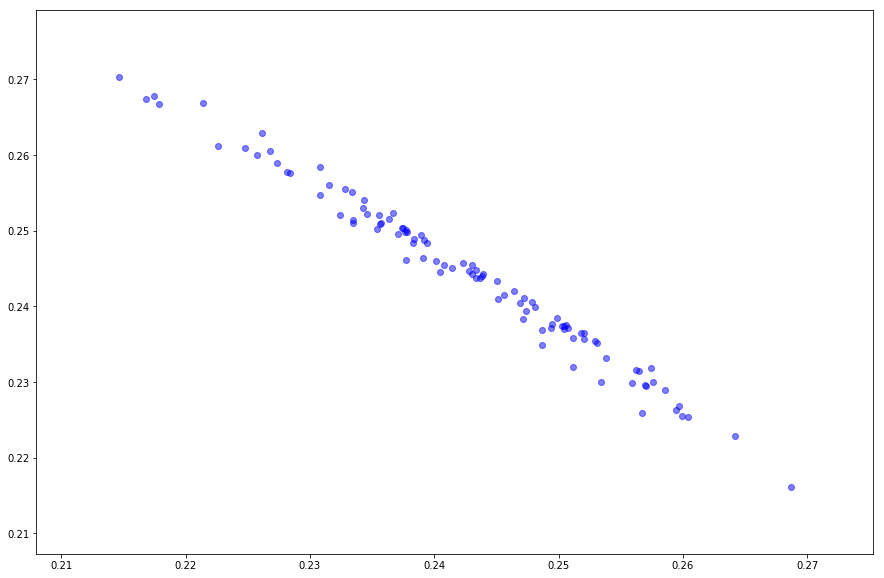

In [31]:
#visualisation of the different score_test and score_train

print("------------------------ White Wine - Scatterplot of score_train(y) against score_test(x) ------------------------")
plt.subplots(figsize=(15,10))
plt.scatter(result_df_w['score_test'],result_df_w['score_train'], c="blue", alpha=0.5)
plt.show()

------------------------------------- Plot of R2 scores ordered by training score ------------------------------------


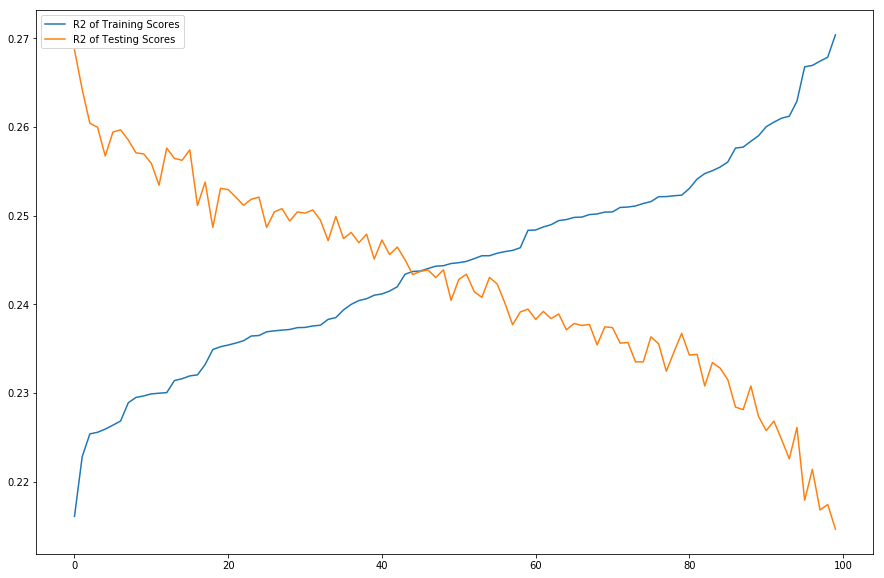

In [32]:
#selecting the model where the R2 values have the smallest difference, ie the point of intersection

result_df_line_w = result_df_w.sort_values(by = 'score_train', ascending = True)
result_df_line_w = result_df_line_w.reset_index()

print("------------------------------------- Plot of R2 scores ordered by training score ------------------------------------")


plt.subplots(figsize=(15,10))
plt.plot(result_df_line_w.index, result_df_line_w['score_train'], label = 'R2 of Training Scores')
plt.plot(result_df_line_w.index, result_df_line_w['score_test'], label = 'R2 of Testing Scores')
plt.legend()


In [33]:
# selecting the best equation from the random state
# selecting the model with the smallest difference between r2 value for score_train and score_test

result_df_w["score_difference"] = abs(result_df_w["score_train"] - result_df_w["score_test"])

result_df_w = result_df_w.sort_values(by = 'score_difference', ascending = True)
result_df_w = result_df_w.reset_index()

print("-------------------- Snapshot of the best models sorted by the min difference in accuracy -------------------")
display(result_df_w.head())

bestrandomstate_1_w = result_df_w["randomstate"][0]
bestcoeff_1_w = result_df_w["coeff"][0]
bestintercept_1_w = result_df_w["intercept"][0]
bestscore_train_1_w = result_df_w["score_train"][0]
bestscore_test_1_w = result_df_w["score_test"][0]

bestrandomstate_2_w = result_df_w["randomstate"][1]
bestcoeff_2_w = result_df_w["coeff"][1]
bestintercept_2_w = result_df_w["intercept"][1]
bestscore_train_2_w = result_df_w["score_train"][1]
bestscore_test_2_w = result_df_w["score_test"][1]

bestrandomstate_3_w = result_df_w["randomstate"][2]
bestcoeff_3_w = result_df_w["coeff"][2]
bestintercept_3_w = result_df_w["intercept"][2]
bestscore_train_3_w = result_df_w["score_train"][2]
bestscore_test_3_w = result_df_w["score_test"][2]

# displaying the best models
np.set_printoptions(precision = 5)

print(f"Features : {features_selected_w}")
print()
print()

print("---------------------------- Best Model -----------------------------")
print(f"Random Seed: {bestrandomstate_1_w}")
print(f"Coefficients: {bestcoeff_1_w}")
print(f"Intercept : {bestintercept_1_w}")
print(f"R2 of Training Set : {bestscore_train_1_w:.5f}")
print(f"R2 of Testing Set : {bestscore_test_1_w:.5f}")
print()

print("----------------------------- 2nd Model -----------------------------")
print(f"Random Seed: {bestrandomstate_2_w}")
print(f"Coefficients: {bestcoeff_2_w}")
print(f"Intercept : {bestintercept_2_w}")
print(f"R2 of Training Set : {bestscore_train_2_w:.5f}")
print(f"R2 of Testing Set : {bestscore_test_2_w:.5f}")
print()

print("----------------------------- 3rd Model -----------------------------")
print(f"Random Seed: {bestrandomstate_3_w}")
print(f"Coefficients: {bestcoeff_3_w}")
print(f"Intercept : {bestintercept_3_w}")
print(f"R2 of Training Set : {bestscore_train_3_w:.5f}")
print(f"R2 of Testing Set : {bestscore_test_3_w:.5f}")
print()

# storing of the best models into a new dataframe
mb_white_df = pd.DataFrame(columns = ['randomstate', 'coeff', 'intercept', 'score_train', 'score_test'])
mb_white_df.loc[0] = [bestrandomstate_1_w, bestcoeff_1_w, bestintercept_1_w, bestscore_train_1_w, bestscore_test_1_w]
mb_white_df.loc[1] = [bestrandomstate_2_w, bestcoeff_2_w, bestintercept_2_w, bestscore_train_2_w, bestscore_test_2_w]
mb_white_df.loc[2] = [bestrandomstate_3_w, bestcoeff_3_w, bestintercept_3_w, bestscore_train_3_w, bestscore_test_3_w]

-------------------- Snapshot of the best models sorted by the min difference in accuracy -------------------


,index,randomstate,coeff,intercept,score_train,score_test,avg_acc_test,avg_acc_train,score_difference
0,91,92,"[[-2.014191926177878, -1.8558032032347407, 0.0...",[2.8141958711460715],0.243746,0.243698,1.023238,1.018685,0.000048
1,89,90,"[[-1.8961429810240333, -2.069247608435542, 0.0...",[2.739620787791677],0.244030,0.243874,1.016423,1.018765,0.000156
2,4,5,"[[-1.922595816824653, -2.132404026133689, 0.00...",[2.725756624091883],0.243696,0.243353,1.021671,1.019069,0.000343
3,0,1,"[[-2.010900391753256, -2.1972144752973164, 0.0...",[2.825194904345818],0.244349,0.243885,1.017949,1.018919,0.000464
4,52,53,"[[-1.950278515111725, -0.9578024975776894, 0.0...",[2.7507028401709954],0.244296,0.243010,1.013798,1.018231,0.001286


Features : ['volatile acidity', 'chlorides', 'total sulfur dioxide', 'alcohol']


---------------------------- Best Model -----------------------------
Random Seed: 92
Coefficients: [[-2.01419e+00 -1.85580e+00  1.44365e-03  3.35245e-01]]
Intercept : [2.8142]
R2 of Training Set : 0.24375
R2 of Testing Set : 0.24370

----------------------------- 2nd Model -----------------------------
Random Seed: 90
Coefficients: [[-1.89614e+00 -2.06925e+00  1.56638e-03  3.36661e-01]]
Intercept : [2.73962]
R2 of Training Set : 0.24403
R2 of Testing Set : 0.24387

----------------------------- 3rd Model -----------------------------
Random Seed: 5
Coefficients: [[-1.92260e+00 -2.13240e+00  1.38500e-03  3.42935e-01]]
Intercept : [2.72576]
R2 of Training Set : 0.24370
R2 of Testing Set : 0.24335



### 7 Model Evaluation & Sensitivity Analysis - White Wine

In [34]:
## model evaluation

from sklearn.metrics import mean_absolute_error

# getting the linear regression model from the randomstate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_1_w)

model = LinearRegression().fit(X_train, y_train)

# applying the linear regression model over the entire dataset
X_test = data_white[features_selected_w]
y_test = data_white[["quality"]]

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("Model Evaluation")
print()

print("-------- Best Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df_w = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df_w = bestmodel_df_w.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

## function to return the error after applying the specified tolerance range
def atleasterror(df1, df2, error_range):
    outputdf = pd.DataFrame(columns = ['error'])
    for i in range (0, df1.size):
        #display(df1[i])
        #display(df2[i])
        
        if abs(df1[i] - df2[i]) > error_range:
            error = abs(df1[i]-df2[i]) - error_range
            #display(error)
            outputdf = outputdf.append({'error': error}, ignore_index = True)
        else:
            #display(0)
            outputdf = outputdf.append({'error': 0}, ignore_index = True)
    return outputdf

bestmodel_df_w["error_0"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0)    
bestmodel_df_w["error_0.25"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.25)
bestmodel_df_w["error_0.5"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.5)
bestmodel_df_w["error_0.75"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.75)
bestmodel_df_w["error_1"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 1)

print("Snapshot of the application of tolerance ranges on the dataset")
print("--------------------------------------------------------------")
display(bestmodel_df_w.head())

# determing mean absolute error
error_0_mean = bestmodel_df_w["error_0"].mean()
error_25_mean = bestmodel_df_w["error_0.25"].mean()
error_50_mean = bestmodel_df_w["error_0.5"].mean()
error_75_mean = bestmodel_df_w["error_0.75"].mean()
error_100_mean = bestmodel_df_w["error_1"].mean()

# creating result dataframe to store values
me_white_df = pd.DataFrame(columns = ['error_0', 'error_0.25', 'error_0.5', 'error_0.75', 'error_1'])

# storing model evaluation results into the dataframe
me_white_df.loc[0] = [error_0_mean, error_25_mean, error_50_mean, error_75_mean, error_100_mean]
#display(me_red_df)

# displaying the result
print("> With a tolerance value of 0, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_0_mean, error_0_mean/ave))
print("> With a tolerance value of 0.25, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_25_mean, error_25_mean/ave))
print("> With a tolerance value of 0.5, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_50_mean, error_50_mean/ave))
print("> With a tolerance value of 0.75, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_75_mean, error_75_mean/ave))
print("> With a tolerance value of 1, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_100_mean, error_100_mean/ave))
print()

##############
# Similar evaulation code for 2nd model
##############

# getting the linear regression model from the randomstate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_2_w)

model = LinearRegression().fit(X_train, y_train)

# applying the linear regression model over the entire dataset
X_test = data_white[features_selected_w]
y_test = data_white[["quality"]]

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 2nd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df_w = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df_w = bestmodel_df_w.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

## function atleasterror defined above
bestmodel_df_w["error_0"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0)    
bestmodel_df_w["error_0.25"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.25)
bestmodel_df_w["error_0.5"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.5)
bestmodel_df_w["error_0.75"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.75)
bestmodel_df_w["error_1"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 1)

print("Snapshot of the application of tolerance ranges on the dataset")
print("--------------------------------------------------------------")
display(bestmodel_df_w.head())

# determing mean absolute error
error_0_mean = bestmodel_df_w["error_0"].mean()
error_25_mean = bestmodel_df_w["error_0.25"].mean()
error_50_mean = bestmodel_df_w["error_0.5"].mean()
error_75_mean = bestmodel_df_w["error_0.75"].mean()
error_100_mean = bestmodel_df_w["error_1"].mean()

# storing model evaluation results into the dataframe
me_white_df.loc[1] = [error_0_mean, error_25_mean, error_50_mean, error_75_mean, error_100_mean]

# displaying the result
print("> With a tolerance value of 0, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_0_mean, error_0_mean/ave))
print("> With a tolerance value of 0.25, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_25_mean, error_25_mean/ave))
print("> With a tolerance value of 0.5, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_50_mean, error_50_mean/ave))
print("> With a tolerance value of 0.75, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_75_mean, error_75_mean/ave))
print("> With a tolerance value of 1, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_100_mean, error_100_mean/ave))
print()

##############
# Similar evaulation code for 3nd model
##############

# getting the linear regression model from the randomstate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=bestrandomstate_3_w)

model = LinearRegression().fit(X_train, y_train)

# applying the linear regression model over the entire dataset
X_test = data_white[features_selected_w]
y_test = data_white[["quality"]]

# predict based on test set
y_pred = model.predict(X_test)

# compare with ground truth
mae=mean_absolute_error(y_test, y_pred)

ave=np.mean(y_test["quality"])

print("-------- 3rd Model --------")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAE as % of mean: {mae/ave:.2f}")
print()
print()

# analysis for different tolerance ranges

y_pred_df = pd.DataFrame(data = y_pred)
#display(y_pred_df)

y_test_0 = y_test.reset_index()
#display(y_test_0)

bestmodel_df_w = pd.concat([y_pred_df, y_test_0["quality"]], axis = 1, ignore_index = True)
bestmodel_df_w = bestmodel_df_w.rename(columns = {0: "y_pred", 1: "y_actual"})
#display(bestmodel_df)

## function atleasterror defined above
bestmodel_df_w["error_0"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0)    
bestmodel_df_w["error_0.25"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.25)
bestmodel_df_w["error_0.5"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.5)
bestmodel_df_w["error_0.75"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 0.75)
bestmodel_df_w["error_1"] = atleasterror(bestmodel_df_w["y_pred"], bestmodel_df_w["y_actual"], 1)

print("Snapshot of the application of tolerance ranges on the dataset")
print("--------------------------------------------------------------")
display(bestmodel_df_w.head())

# determing mean absolute error
error_0_mean = bestmodel_df_w["error_0"].mean()
error_25_mean = bestmodel_df_w["error_0.25"].mean()
error_50_mean = bestmodel_df_w["error_0.5"].mean()
error_75_mean = bestmodel_df_w["error_0.75"].mean()
error_100_mean = bestmodel_df_w["error_1"].mean()

# storing model evaluation results into the dataframe
me_white_df.loc[2] = [error_0_mean, error_25_mean, error_50_mean, error_75_mean, error_100_mean]

# displaying the result
print("> With a tolerance value of 0, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_0_mean, error_0_mean/ave))
print("> With a tolerance value of 0.25, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_25_mean, error_25_mean/ave))
print("> With a tolerance value of 0.5, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_50_mean, error_50_mean/ave))
print("> With a tolerance value of 0.75, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_75_mean, error_75_mean/ave))
print("> With a tolerance value of 1, the MAE is %.5f, which as a percentage of mean is %.5f" % (error_100_mean, error_100_mean/ave))
print()

Model Evaluation

-------- Best Model --------
Mean Absolute Error: 0.60
MAE as % of mean: 0.10


Snapshot of the application of tolerance ranges on the dataset
--------------------------------------------------------------


,y_pred,y_actual,error_0,error_0.25,error_0.5,error_0.75,error_1
0,5.382428,6,0.617572,0.367572,0.117572,0,0
1,5.494392,6,0.505608,0.255608,0.005608,0,0
2,5.683440,6,0.316560,0.066560,0.000000,0,0
3,5.830738,6,0.169262,0.000000,0.000000,0,0
4,5.830738,6,0.169262,0.000000,0.000000,0,0


> With a tolerance value of 0, the MAE is 0.60218, which as a percentage of mean is 0.10245
> With a tolerance value of 0.25, the MAE is 0.38181, which as a percentage of mean is 0.06496
> With a tolerance value of 0.5, the MAE is 0.22424, which as a percentage of mean is 0.03815
> With a tolerance value of 0.75, the MAE is 0.12959, which as a percentage of mean is 0.02205
> With a tolerance value of 1, the MAE is 0.07525, which as a percentage of mean is 0.01280

-------- 2nd Model --------
Mean Absolute Error: 0.60
MAE as % of mean: 0.10


Snapshot of the application of tolerance ranges on the dataset
--------------------------------------------------------------


,y_pred,y_actual,error_0,error_0.25,error_0.5,error_0.75,error_1
0,5.363448,6,0.636552,0.386552,0.136552,0,0
1,5.474427,6,0.525573,0.275573,0.025573,0,0
2,5.657454,6,0.342546,0.092546,0.000000,0,0
3,5.807782,6,0.192218,0.000000,0.000000,0,0
4,5.807782,6,0.192218,0.000000,0.000000,0,0


> With a tolerance value of 0, the MAE is 0.60166, which as a percentage of mean is 0.10236
> With a tolerance value of 0.25, the MAE is 0.38131, which as a percentage of mean is 0.06487
> With a tolerance value of 0.5, the MAE is 0.22399, which as a percentage of mean is 0.03811
> With a tolerance value of 0.75, the MAE is 0.12986, which as a percentage of mean is 0.02209
> With a tolerance value of 1, the MAE is 0.07557, which as a percentage of mean is 0.01286

-------- 3rd Model --------
Mean Absolute Error: 0.60
MAE as % of mean: 0.10


Snapshot of the application of tolerance ranges on the dataset
--------------------------------------------------------------


,y_pred,y_actual,error_0,error_0.25,error_0.5,error_0.75,error_1
0,5.363974,6,0.636026,0.386026,0.136026,0,0
1,5.485190,6,0.514810,0.264810,0.014810,0,0
2,5.678796,6,0.321204,0.071204,0.000000,0,0
3,5.812545,6,0.187455,0.000000,0.000000,0,0
4,5.812545,6,0.187455,0.000000,0.000000,0,0


> With a tolerance value of 0, the MAE is 0.60217, which as a percentage of mean is 0.10245
> With a tolerance value of 0.25, the MAE is 0.38171, which as a percentage of mean is 0.06494
> With a tolerance value of 0.5, the MAE is 0.22394, which as a percentage of mean is 0.03810
> With a tolerance value of 0.75, the MAE is 0.12967, which as a percentage of mean is 0.02206
> With a tolerance value of 1, the MAE is 0.07555, which as a percentage of mean is 0.01285



### 8 Clustering - Red Wine

We decided to perform K clustering to identify if there are certain chemical features of the wine amongst our selected features which may siginificantly affect the wine quality ratings. This is because due to the differnces in the initial expected values of each feature, it is difficult to determine the importance of the features in determing the wine quality from the multiple linear regression model.

For the K Clustering, we made use of the `KMeans` function from the `sklearn.cluster` library.

In [35]:
import matplotlib.pyplot as plt
import numpy as np
#display(data_red[features_selected].head())
X = data_red[features_selected].values

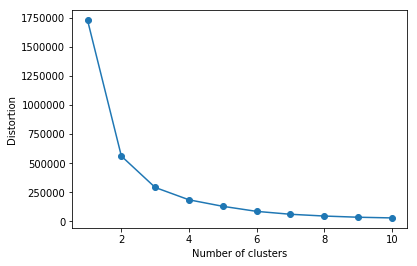

In [36]:
from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We decided to go with 3 clusters for red wine as it is near the elbow of the distortion graph as provides a sufficient number of types for our wine.

In [37]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

#labeling the original data with their assigned cluster
data_red['cluster'] = km.labels_

## K-clustering Metrics
# print(km.inertia_)
# print(km.cluster_centers_)
# print(km.labels_)
# print(km.n_iter_)

--------------------------------- Cluster 1 Summary ---------------------------------


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.47000,0.58250,0.653750,238.0,1.24000,0.573992,0.18000,0.170032
total sulfur dioxide,90.00000,102.00000,121.000000,238.0,289.00000,108.848739,83.00000,25.670630
density,0.99616,0.99715,0.997945,238.0,1.00369,0.996875,0.99007,0.002137
sulphates,0.53000,0.58000,0.680000,238.0,1.98000,0.650756,0.39000,0.226939
alcohol,9.40000,9.65000,10.100000,238.0,14.00000,10.016176,8.50000,1.037721


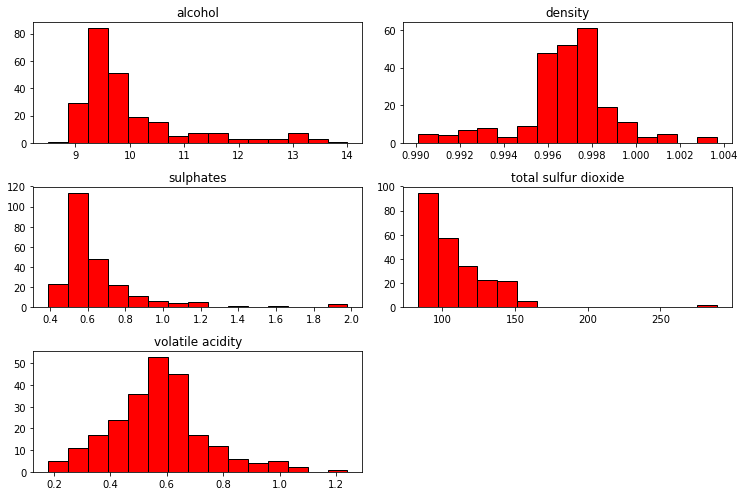

In [38]:
import seaborn as sns
cluster1 = X[y_km == 0]
cluster1_df = pd.DataFrame(data = cluster1, columns = features_selected)
cluster1_df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)
plt.tight_layout(rect=(0, 0, 1.75, 1.75))



def printsummary(dataframe, features):
    temp = pd.DataFrame()
    for f in features:
        temp = temp.append(dataframe[f].describe())
    return temp

print("--------------------------------- Cluster 1 Summary ---------------------------------")
rs1 = printsummary(cluster1_df, features_selected)
display(rs1)

------------------------------ Cluster 2 Summary ------------------------------


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.38000,0.51000,0.64000,841.0,1.58000,0.520030,0.1200,0.189022
total sulfur dioxide,15.00000,23.00000,30.00000,841.0,39.00000,22.910820,6.0000,8.753388
density,0.99545,0.99655,0.99761,841.0,1.00315,0.996588,0.9915,0.001784
sulphates,0.55000,0.62000,0.72000,841.0,1.56000,0.648193,0.3300,0.143383
alcohol,9.70000,10.50000,11.30000,841.0,14.00000,10.593004,8.4000,1.052451


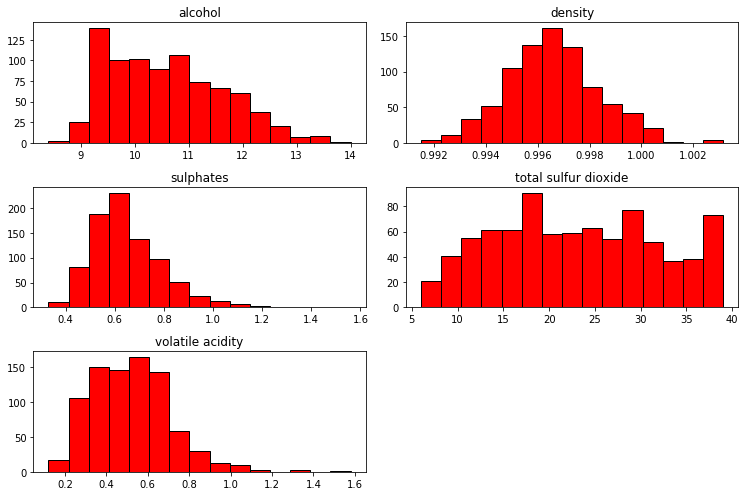

In [39]:
cluster2 = X[y_km == 1]
cluster2_df = pd.DataFrame(data = cluster2, columns = features_selected)
cluster2_df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)
plt.tight_layout(rect=(0, 0, 1.75, 1.75))

print("------------------------------ Cluster 2 Summary ------------------------------")
rs2 = printsummary(cluster2_df, features_selected)
display(rs2)

----------------------------- Cluster 3 Summary -----------------------------


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.40000,0.51000,0.620,520.0,1.1800,0.519288,0.1600,0.162916
total sulfur dioxide,46.00000,54.00000,65.000,520.0,82.0000,56.015385,40.0000,11.481020
density,0.99576,0.99685,0.998,520.0,1.0032,0.996944,0.9902,0.001909
sulphates,0.57000,0.64000,0.750,520.0,2.0000,0.677635,0.4000,0.176379
alcohol,9.50000,10.10000,10.900,520.0,14.9000,10.334199,8.7000,1.039974


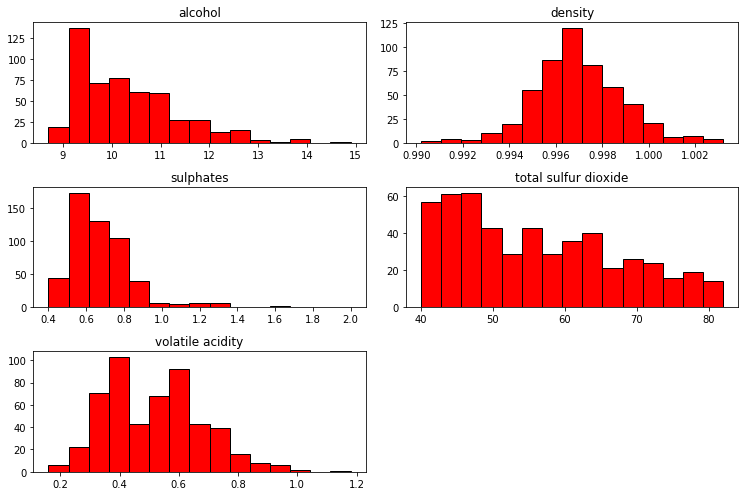

In [40]:
cluster3 = X[y_km == 2]
cluster3_df = pd.DataFrame(data = cluster3, columns = features_selected)
cluster3_df.hist(bins=15, color='red', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)
plt.tight_layout(rect=(0, 0, 1.75, 1.75))

print("----------------------------- Cluster 3 Summary -----------------------------")
rs3 = printsummary(cluster3_df, features_selected)
display(rs3)

In [41]:
print("Summary of the 3 clusters")
print("")

print("Cluster 1")
display(rs1)
print("")

print("Cluster 2")
display(rs2)
print("")

print("Cluster 3")
display(rs3)
print("")

Summary of the 3 clusters

Cluster 1


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.47000,0.58250,0.653750,238.0,1.24000,0.573992,0.18000,0.170032
total sulfur dioxide,90.00000,102.00000,121.000000,238.0,289.00000,108.848739,83.00000,25.670630
density,0.99616,0.99715,0.997945,238.0,1.00369,0.996875,0.99007,0.002137
sulphates,0.53000,0.58000,0.680000,238.0,1.98000,0.650756,0.39000,0.226939
alcohol,9.40000,9.65000,10.100000,238.0,14.00000,10.016176,8.50000,1.037721



Cluster 2


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.38000,0.51000,0.64000,841.0,1.58000,0.520030,0.1200,0.189022
total sulfur dioxide,15.00000,23.00000,30.00000,841.0,39.00000,22.910820,6.0000,8.753388
density,0.99545,0.99655,0.99761,841.0,1.00315,0.996588,0.9915,0.001784
sulphates,0.55000,0.62000,0.72000,841.0,1.56000,0.648193,0.3300,0.143383
alcohol,9.70000,10.50000,11.30000,841.0,14.00000,10.593004,8.4000,1.052451



Cluster 3


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.40000,0.51000,0.620,520.0,1.1800,0.519288,0.1600,0.162916
total sulfur dioxide,46.00000,54.00000,65.000,520.0,82.0000,56.015385,40.0000,11.481020
density,0.99576,0.99685,0.998,520.0,1.0032,0.996944,0.9902,0.001909
sulphates,0.57000,0.64000,0.750,520.0,2.0000,0.677635,0.4000,0.176379
alcohol,9.50000,10.10000,10.900,520.0,14.9000,10.334199,8.7000,1.039974


After obtaining the 3 clusters for the red wine, we performed a *independent 2 sample t-test* for each feature between all 3 clusters. This is to select for the features which are significantly different in 1 cluster as compared to another cluster.

We used a two tailed confidence interval of 95% which means that the *t-statistic* of the *t-test* must be > 1.960.

In [42]:
import numpy as np
import math as math
## Welch's t-test for independent 2 sample t-test with unequal population variance
def calculatettest(f1_mean, f1_std, f1_n, f2_mean, f2_std, f2_n):
    tvalue = (f1_mean - f2_mean)/(math.sqrt((f1_std*f1_std/f1_n) + (f2_std*f2_std/f2_n)))
    
    return tvalue

def extractrow(df1, df2, df3, rowname):
    temp = pd.DataFrame()
    temp = temp.append(df1.loc[rowname])
    temp = temp.append(df2.loc[rowname])
    temp = temp.append(df3.loc[rowname])

    temp2 = pd.DataFrame()
    temp2['mean'] = temp['mean'].values
    temp2['std'] = temp['std'].values
    temp2['count'] = temp['count'].values
    
    return temp2
    

def runttest(df):
    output = pd.DataFrame(columns = ['Cluster A', 'Cluster B', 't-value'])
    for index1, row1 in df.iterrows():
        for index2, row2 in df.iterrows():
            if (index1 == index2):
                continue
            else:
                tvalue = calculatettest(row1['mean'], row1['std'], row1['count'], 
                                                      row2['mean'], row2['std'], row2['count'])
                temp1 = {'Cluster A': index1+1, 'Cluster B': index2+1, 't-value':tvalue}
                output = output.append(temp1, ignore_index = True)
    return output

def filter95(df):
    output = df[df['t-value'] > 1.960]
    return output

def executettest(string):
    print('Feature selected -->  ' + string)
    feature_c = extractrow(rs1, rs2, rs3, string)
    feature_c_ttest = runttest(feature_c)
    feature_c_filter95 = filter95(feature_c_ttest)
    return(feature_c_filter95)


vc_filtered = executettest('volatile acidity')
display(vc_filtered)

tsd_filtered = executettest('total sulfur dioxide')
display(tsd_filtered)

d_filtered = executettest('density')
display(d_filtered)

s_filtered = executettest('sulphates')
display(s_filtered)

a_filtered = executettest('alcohol')
display(a_filtered)

Feature selected -->  volatile acidity


,Cluster A,Cluster B,t-value
0,1.0,2.0,4.214252
1,1.0,3.0,4.164841


Feature selected -->  total sulfur dioxide


,Cluster A,Cluster B,t-value
0,1.0,2.0,50.816719
1,1.0,3.0,30.390524
5,3.0,2.0,56.393974


Feature selected -->  density


,Cluster A,Cluster B,t-value
5,3.0,2.0,3.43102


Feature selected -->  sulphates


,Cluster A,Cluster B,t-value
5,3.0,2.0,3.20721


Feature selected -->  alcohol


,Cluster A,Cluster B,t-value
2,2.0,1.0,7.547035
3,2.0,3.0,4.440465
4,3.0,1.0,3.913239


#### From the *t-test* analysis, we have identified these unqiue factors about our red wine clusters:

**Cluster 1**

Cluster 1 contains red wine that are significantly higher in *Volatile Acidity* and *Total Sulfur Dioxide* as compared to the other clusters.

**Cluster 2**

Cluster 2 contains red wine that are siginificantly higher in *Alcohol* as compared to the other clusters.

**Cluster 3**

Cluster 3 contains red wine that are relatively balanced in all their chemical features.

Quality Distribution for Red Wine Cluster ---->  1


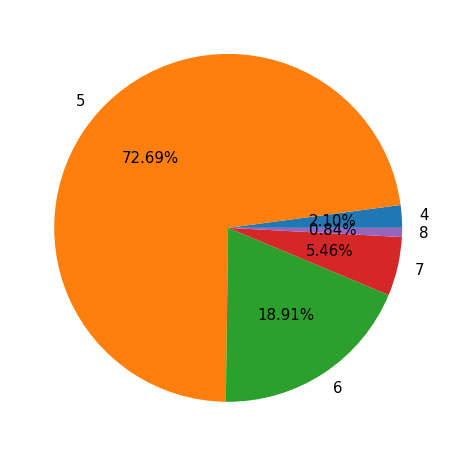

Quality Distribution for Red Wine Cluster ---->  2


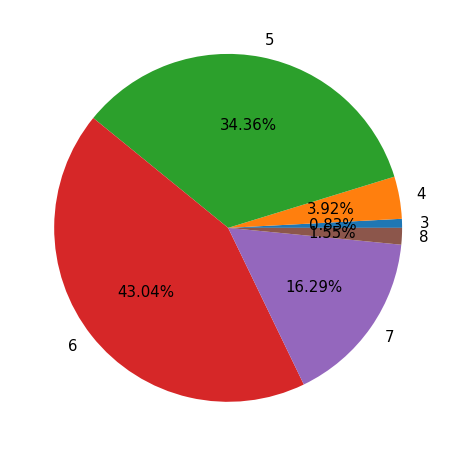

Quality Distribution for Red Wine Cluster ---->  3


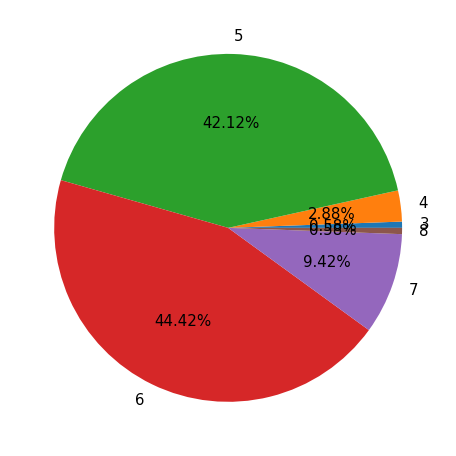

In [43]:
import matplotlib.pyplot as pyplot
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

def plotbycluster(cluster):
    print("Quality Distribution for Red Wine Cluster ----> ", cluster)
    cluster -= 1
    data_red_c = data_red[data_red['cluster'] == cluster]
    vc = data_red_c['quality'].value_counts(sort = False)
    
    pyplot.subplots(figsize=(10,8))
    pyplot.pie(vc, labels = vc.keys(), autopct = '%.2f%%')
    pyplot.show()

plotbycluster(1)
plotbycluster(2)
plotbycluster(3)



We noted that for the red wine cluster with higher alcohol it had the largest proportion of high quality ratings (>=7) but it also had the largest proportion of low quality ratings (<=4) which may be due to the opposing effect alcohol may have on quality based on its quantity.

We also noted that that for the cluster with higher volatile acidity and total sulfur dioxide, it had the lowest proportion of high quality ratings, with majority of its ratings at 5.

### 9 Clustering - White Wine

A similar process was repeated for the white wine

In [44]:
import matplotlib.pyplot as plt
import numpy as np

X = data_white[features_selected_w].values
display(data_white[features_selected_w].head())

,volatile acidity,chlorides,total sulfur dioxide,alcohol
0,0.27,0.045,170.0,8.8
1,0.30,0.049,132.0,9.5
2,0.28,0.050,97.0,10.1
3,0.23,0.058,186.0,9.9
4,0.23,0.058,186.0,9.9


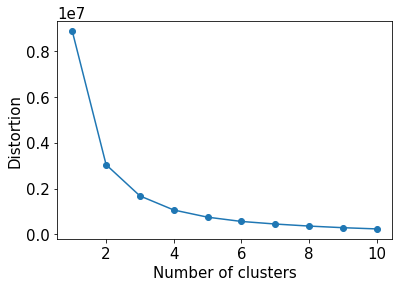

In [45]:
from sklearn.cluster import KMeans

# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

We decided to go with 3 clusters for white wine as it is near the elbow of the distortion graph as provides a sufficient number of types for our wine.

In [46]:
km = KMeans(
    n_clusters=3, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

y_km = km.fit_predict(X)

#labeling the original data with their assigned cluster
data_white['cluster'] = km.labels_

## K-clustering Metrics
# print(km.inertia_)
# print(km.cluster_centers_)
# print(km.labels_)
# print(km.n_iter_)

--------------------------------- Cluster 1 Summary ---------------------------------


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.200,0.250,0.320,1828.0,1.100,0.271299,0.080,0.104972
chlorides,0.032,0.038,0.046,1828.0,0.217,0.041027,0.009,0.019213
total sulfur dioxide,86.000,100.000,111.000,1828.0,120.000,96.347648,9.000,18.985884
alcohol,10.200,11.100,12.100,1828.0,14.200,11.098596,8.400,1.201332


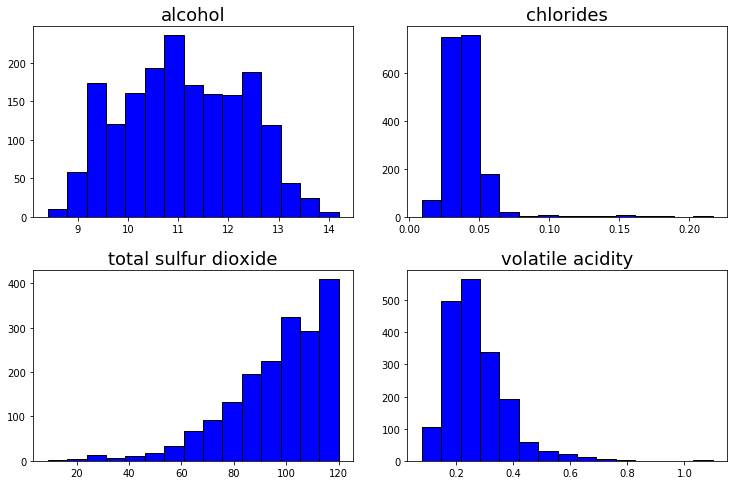

In [47]:
import seaborn as sns
cluster1_w = X[y_km == 0]
cluster1_df_w = pd.DataFrame(data = cluster1_w, columns = features_selected_w)
cluster1_df_w.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)
plt.tight_layout(rect=(0, 0, 1.75, 1.75))



def printsummary(dataframe, features):
    temp = pd.DataFrame()
    for f in features:
        temp = temp.append(dataframe[f].describe())
    return temp

print("--------------------------------- Cluster 1 Summary ---------------------------------")
rs1_w = printsummary(cluster1_df_w, features_selected_w)
display(rs1_w)

------------------------------ Cluster 2 Summary ------------------------------


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.210,0.260,0.320,1982.0,0.965,0.274344,0.080,0.095922
chlorides,0.037,0.044,0.051,1982.0,0.271,0.046689,0.014,0.020760
total sulfur dioxide,132.000,144.000,156.000,1982.0,171.000,144.352926,121.000,14.594941
alcohol,9.400,10.300,11.200,1982.0,14.000,10.419902,8.000,1.170287


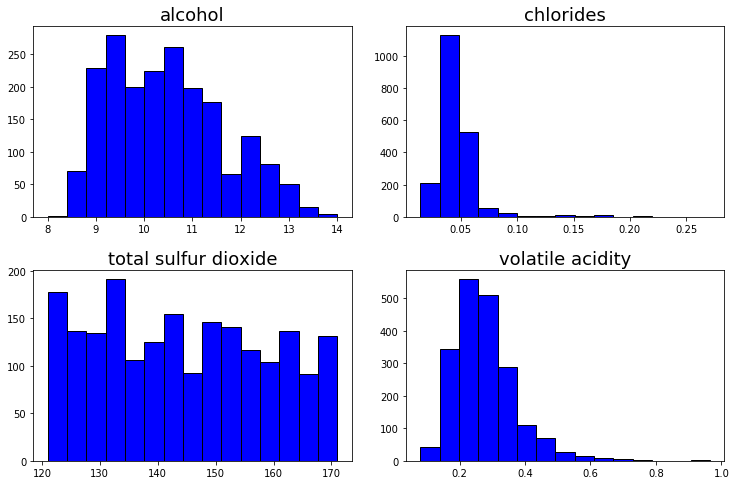

In [48]:
cluster2_w = X[y_km == 1]
cluster2_df_w = pd.DataFrame(data = cluster2_w, columns = features_selected_w)
cluster2_df_w.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)
plt.tight_layout(rect=(0, 0, 1.75, 1.75))

print("------------------------------ Cluster 2 Summary ------------------------------")
rs2_w = printsummary(cluster2_df_w, features_selected_w)
display(rs2_w)

----------------------------- Cluster 3 Summary -----------------------------


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.240,0.280,0.330,1088.0,1.005,0.297004,0.130,0.100096
chlorides,0.043,0.048,0.054,1088.0,0.346,0.052076,0.019,0.025796
total sulfur dioxide,181.000,192.000,210.000,1088.0,440.000,198.032629,172.000,23.337216
alcohol,9.100,9.500,10.000,1088.0,13.100,9.704412,8.500,0.808715


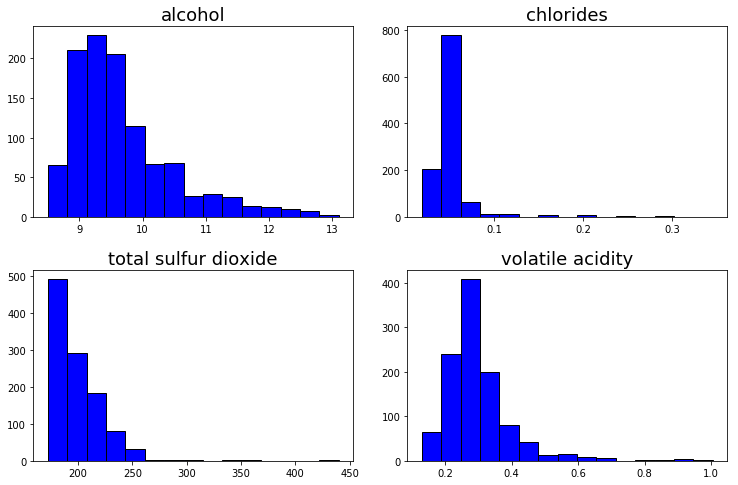

In [49]:
cluster3_w = X[y_km == 2]
cluster3_df_w = pd.DataFrame(data = cluster3_w, columns = features_selected_w)
cluster3_df_w.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0,
           xlabelsize=10, ylabelsize=10, grid=False)
plt.tight_layout(rect=(0, 0, 1.75, 1.75))

print("----------------------------- Cluster 3 Summary -----------------------------")
rs3_w = printsummary(cluster3_df_w, features_selected_w)
display(rs3_w)

In [50]:
print("Summary of the 3 clusters")
print("")

print("Cluster 1")
display(rs1_w)
print("")

print("Cluster 2")
display(rs2_w)
print("")

print("Cluster 3")
display(rs3_w)
print("")

Summary of the 3 clusters

Cluster 1


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.200,0.250,0.320,1828.0,1.100,0.271299,0.080,0.104972
chlorides,0.032,0.038,0.046,1828.0,0.217,0.041027,0.009,0.019213
total sulfur dioxide,86.000,100.000,111.000,1828.0,120.000,96.347648,9.000,18.985884
alcohol,10.200,11.100,12.100,1828.0,14.200,11.098596,8.400,1.201332



Cluster 2


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.210,0.260,0.320,1982.0,0.965,0.274344,0.080,0.095922
chlorides,0.037,0.044,0.051,1982.0,0.271,0.046689,0.014,0.020760
total sulfur dioxide,132.000,144.000,156.000,1982.0,171.000,144.352926,121.000,14.594941
alcohol,9.400,10.300,11.200,1982.0,14.000,10.419902,8.000,1.170287



Cluster 3


,25%,50%,75%,count,max,mean,min,std
volatile acidity,0.240,0.280,0.330,1088.0,1.005,0.297004,0.130,0.100096
chlorides,0.043,0.048,0.054,1088.0,0.346,0.052076,0.019,0.025796
total sulfur dioxide,181.000,192.000,210.000,1088.0,440.000,198.032629,172.000,23.337216
alcohol,9.100,9.500,10.000,1088.0,13.100,9.704412,8.500,0.808715


After obtaining the 3 clusters for the red wine, we performed a *2 independent sample t-test* for each feature between all 3 clusters. This is to select for the features which are significantly different in 1 cluster as compared to another cluster.

We used a two tailed confidence interval of 95% which means that the *t-statistic* of the *t-test* must be > 1.960.

In [51]:
import numpy as np
import math as math
def calculatettest(f1_mean, f1_std, f1_n, f2_mean, f2_std, f2_n):
    tvalue = (f1_mean - f2_mean)/(math.sqrt((f1_std*f1_std/f1_n) + (f2_std*f2_std/f2_n)))
    
    return tvalue

def extractrow(df1, df2, df3, rowname):
    temp = pd.DataFrame()
    temp = temp.append(df1.loc[rowname])
    temp = temp.append(df2.loc[rowname])
    temp = temp.append(df3.loc[rowname])

    temp2 = pd.DataFrame()
    temp2['mean'] = temp['mean'].values
    temp2['std'] = temp['std'].values
    temp2['count'] = temp['count'].values
    
    return temp2
    

def runttest(df):
    output = pd.DataFrame(columns = ['Cluster A', 'Cluster B', 't-value'])
    for index1, row1 in df.iterrows():
        for index2, row2 in df.iterrows():
            if (index1 == index2):
                continue
            else:
                tvalue = calculatettest(row1['mean'], row1['std'], row1['count'], 
                                                      row2['mean'], row2['std'], row2['count'])
                temp1 = {'Cluster A': index1+1, 'Cluster B': index2+1, 't-value':tvalue}
                output = output.append(temp1, ignore_index = True)
    return output

def filter95(df):
    output = df[df['t-value'] > 1.960]
    return output

def executettest(string):
    print('Feature selected -->  ' + string)
    feature_c = extractrow(rs1_w, rs2_w, rs3_w, string)
    feature_c_ttest = runttest(feature_c)
    feature_c_filter95 = filter95(feature_c_ttest)
    return(feature_c_filter95)


vc_filtered = executettest('volatile acidity')
display(vc_filtered)

tsd_filtered = executettest('total sulfur dioxide')
display(tsd_filtered)

c_filtered = executettest('chlorides')
display(c_filtered)

a_filtered = executettest('alcohol')
display(a_filtered)

Feature selected -->  volatile acidity


,Cluster A,Cluster B,t-value
4,3.0,1.0,6.585075
5,3.0,2.0,6.088478


Feature selected -->  total sulfur dioxide


,Cluster A,Cluster B,t-value
2,2.0,1.0,86.971841
4,3.0,1.0,121.731263
5,3.0,2.0,68.840022


Feature selected -->  chlorides


,Cluster A,Cluster B,t-value
2,2.0,1.0,8.743071
4,3.0,1.0,12.250632
5,3.0,2.0,5.917102


Feature selected -->  alcohol


,Cluster A,Cluster B,t-value
0,1.0,2.0,17.638811
1,1.0,3.0,37.386632
3,2.0,3.0,19.904514


#### From the *t-test* analysis, we have identified these unqiue factors about our white wine clusters:

**Cluster 1**

Cluster 1 contains white wine that are significantly higher in *Alcohol* as compared to the other clusters.

**Cluster 2**

Cluster 2 contains white wine that are relatively balanced in all their chemacal features.

**Cluster 3**

Cluster 3 contains white wine that are siginificantly higher in *Volatile Acidity*, *Total sulfur Dioxide* and *Chlorides* as compared to the other clusters.

Quality Distribution for White Wine Cluster ---->  1


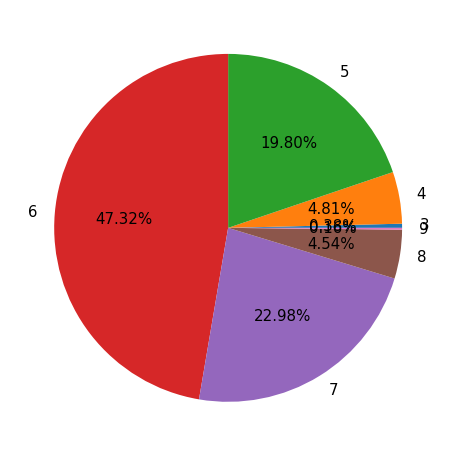

Quality Distribution for White Wine Cluster ---->  2


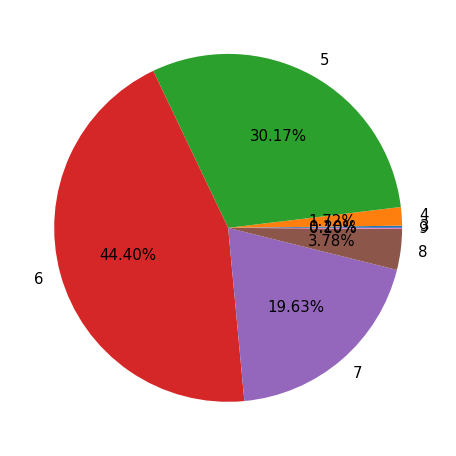

Quality Distribution for White Wine Cluster ---->  3


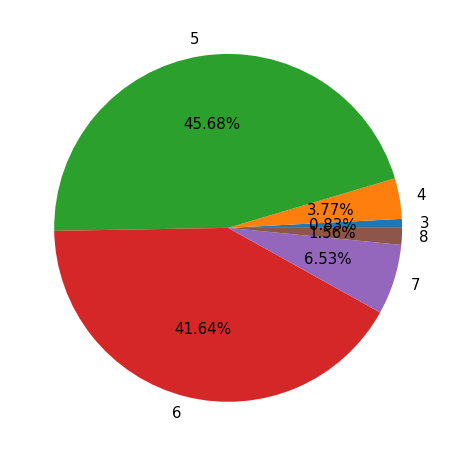

In [52]:
import matplotlib.pyplot as pyplot
import matplotlib
matplotlib.rcParams.update({'font.size': 15})

def plotbycluster_w(cluster):
    print("Quality Distribution for White Wine Cluster ----> ", cluster)
    cluster -= 1
    data_white_c = data_white[data_white['cluster'] == cluster]
    vc = data_white_c['quality'].value_counts(sort = False)
    
    pyplot.subplots(figsize=(10,8))
    pyplot.pie(vc, labels = vc.keys(), autopct = '%.2f%%')
    pyplot.show()

plotbycluster_w(1)
plotbycluster_w(2)
plotbycluster_w(3)


We noted similar trends for the white wine clusters. The white wine cluster siginificantly higher in alcohol had the
larget propotion of higher scores(>=7) but also the largest proportion of lower scores(<= 4).

The white wine cluster significantly higher in volatile acidity, total sulfur dioxide and chlorides was also had the
lowest propotion of high scores, with most scoring about 5.

### 10 Conclusion

In conclusion, the summarised results of the model building for the red and white wine are listed below.

The 3 best Linear Regression Models for *red wine* are 

*Best Model*

\begin{equation}
 Quality = 15.2 - (1.16 \times Volatile Acidity) - (0.00211 \times Total Sulfur Dioxide) - (12.1 \times Density) + (0.741 \times Sulphates) \\ + (0.270 \times Alcohol) 
\end{equation}

*Model 2*

\begin{equation}
 Quality = 4.47 - (1.25 \times Volatile Acidity) - (0.00241 \times Total Sulfur Dioxide) - (1.63 \times Density) + (0.814 \times Sulphates) \\ + (0.290 \times Alcohol)
\end{equation}

*Model 3*

\begin{equation}
 Quality = -10.5 - (1.34 \times Volatile Acidity) - (0.00244 \times Total Sulfur Dioxide) + (13.3 \times Density) + (0.501 \times Sulphates) + (0.314 \times Alcohol)
\end{equation}

The 3 best Linear Regression Models for *white wine* are 

*Best Model*

\begin{equation}
 Quality = 2.81 - (2.01 \times Volatile Acidity) - (1.86 \times Chlorides) + (0.00144 \times Total Sulfur Dioxide) + (0.335 \times Alcohol)
\end{equation}

*Model 2*

\begin{equation}
 Quality = 2.74 - (1.90 \times Volatile Acidity) - (2.07 \times Chlorides) + (0.00157 \times Total Sulfur Dioxide) + (0.337 \times Alcohol)
\end{equation}

*Model 3*

\begin{equation}
 Quality = 2.73 - (1.92 \times Volatile Acidity) - (2.13 \times Chlorides) + (0.00139 \times Total Sulfur Dioxide) + (0.343 \times Alcohol)
\end{equation}

The summarised results of the sensitivity analysis for red and white wine are listed below.

In [53]:
print("------ Summary Table of MAE for Red Wine ------")
me_red_df.index += 1
display(me_red_df)

print("")
print("------ Summary Table of MAE for White Wine ------")
me_white_df.index += 1
display(me_white_df)

------ Summary Table of MAE for Red Wine ------


,error_0,error_0.25,error_0.5,error_0.75,error_1
1,0.511489,0.297862,0.161634,0.082378,0.041838
2,0.507449,0.297375,0.162749,0.083221,0.041640
3,0.507656,0.298780,0.163844,0.083923,0.041850



------ Summary Table of MAE for White Wine ------


,error_0,error_0.25,error_0.5,error_0.75,error_1
1,0.602178,0.381810,0.224236,0.129594,0.075248
2,0.601658,0.381309,0.223993,0.129855,0.075573
3,0.602174,0.381714,0.223942,0.129669,0.075555


### The final selected model for red and white wine:

_**Red Wine**: Model 2_

\begin{equation}
 Quality = 4.47 - (1.25 \times Volatile Acidity) - (0.00241 \times Total Sulfur Dioxide) - (1.63 \times Density) + (0.814 \times Sulphates) \\ + (0.290 \times Alcohol)
\end{equation}

_**White Wine**: Best Model_

\begin{equation}
 Quality = 2.81 - (2.01 \times Volatile Acidity) - (1.86 \times Chlorides) + (0.00144 \times Total Sulfur Dioxide) + (0.335 \times Alcohol)
\end{equation}

### 11 References
- Cross Validation: https://scikit-learn.org/stable/modules/cross_validation.html
- Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/
- Linear Regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- Mean Absolute Error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html
- Normal Distribution for Ratings Data: https://www.aaai.org/ocs/index.php/ICWSM/ICWSM13/paper/view/6117/6349
- KMeans Clustering: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html